# 2.概率分布

In [2]:
# preparation
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from prml.rv import (
    Bernoulli,
    Beta,
    Categorical,
    Dirichlet,
    Gamma,
    Gaussian,
    MultivariateGaussian,
    MultivariateGaussianMixture,
    StudentsT,
    Uniform
)

np.random.seed(1234)

本章学习各种特殊的概率分布。作用：在有限观测下，对p(x)进行建模-密度估计.每次取样都是独立同分布的。<p>
我们用离散随机变量的二项分布和多项式分布，连续随机变量的高斯分布的参数估计。
- 频率派计算似然函数之类的确定参数。
- 贝叶斯派引入参数的先验，来计算后验。<p>

还有个重要概念：共轭先验：后验概率和先验概率分布相同。<p>
也会介绍非参数密度估计的方法。

## 2.1 二元变量
x只能取0或1，取1的概率是$\mu$(扔损坏的硬币)

$$ p(x = 1|\mu) = \mu \tag{2.1} $$

$0 \leq \mu \leq 1 $，所以$ p(x=0|\mu) = 1 - \mu $。概率分布为：

$$ Bern(x|\mu) = \mu^x(1-\mu)^{1 - x} \tag{2.2} $$

这就是伯努利分布。

它归一化的，均值和方差也可以计算。

$E[x]=\mu \tag{2.3}$

$var[x]=\mu(1-\mu) \tag{2.4}$

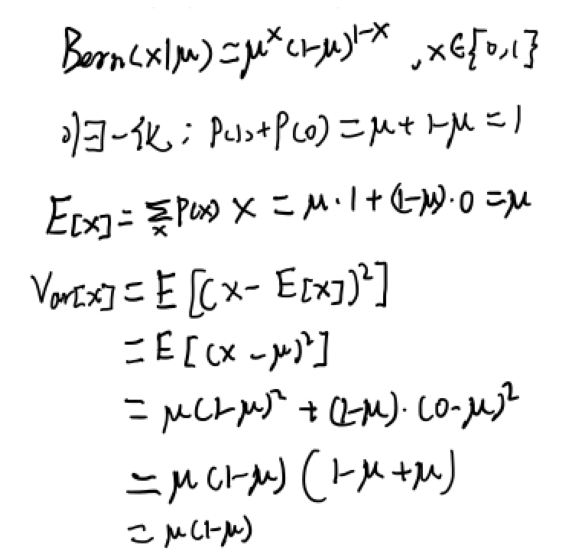

In [5]:
# bern归一化
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.1bern归一化.png')
plt.axis('off')
ax.imshow(d)

如果观测值是数据集$D=\{x_1,...,x_N\}$，每次观测都是在$p(x|\mu)$中抽取。则似然函数有：

$$ p(D|\mu) = \prod\limits_{n=1}^Np(x_n|\mu) = \prod\limits_{n=1}^{N}\mu^{x_n}(1-\mu)^{1-x_n} \tag{2.5} $$

频度派：最大化似然函数来估计参数----最大化对数似然。

$$ \ln p(D|\mu) = \sum\limits_{n=1}^N\ln p(x_n|\mu) = \sum\limits_{n=1}^N{x_n\ln \mu + (1 - x_n)\ln(1-\mu)} \tag{2.6} $$

**这个只用N次观测结果得到的似然函数，也叫充分统计量。**令其导数为零，我们有最大似然的估计值时的$\mu$:

$$ \mu_{ML} = \frac{1}{N}\sum\limits_{n=1}^N x_n \tag{2.7} $$

这也叫做样本均值。如果把x=1的观测次数记录为m，则2.7可以写成：

$$ \mu_{ML} = \frac{m}{N} \tag{2.8} $$

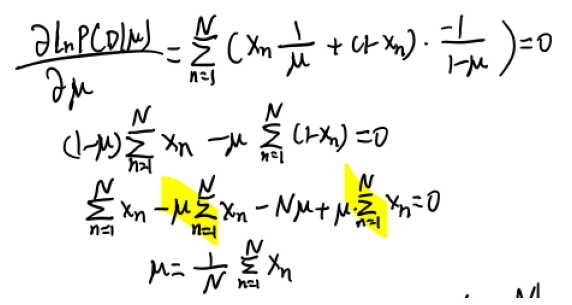

In [9]:
# 最大似然
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.1最大似然.png')
plt.axis('off')
ax.imshow(d)

但这个只用观测可能不靠谱，扔硬币三次刚好都是正面N=m=3,则会判断未来观测都是正面。

In [3]:
model = Bernoulli()
model.fit(np.array([0., 1., 1., 1.]))
print(model)

Bernoulli(
    mu=0.75
)


In [4]:
model = Bernoulli()
model.fit(np.array([1., 1., 1., 1.]))
print(model)

Bernoulli(
    mu=1.0
)


一般引入先验来解决。

换一个角度，在给定数据集规模N的条件下，x=1的观测出现数量m的概率分布：二项分布。

概率是正比于$ \mu^m(1 - \mu)^{N - m} $的.就是每次扔硬币的结果叠乘得到的。

而且需要归一化常数：N次抛掷中，m个正面向上的次数的组合$C_N^m$为归一化常数。

$$ Bin(m|N, \mu) = \binom{N}{m}\mu^m(1 - \mu)^{N - m} \tag{2.9} $$

其中 $$ \binom{N}{m} \equiv \frac{N!}{(N - m)!m!} \tag{2.10} $$

$ N = 10, \mu = 0.25 $二项式分布示意图:

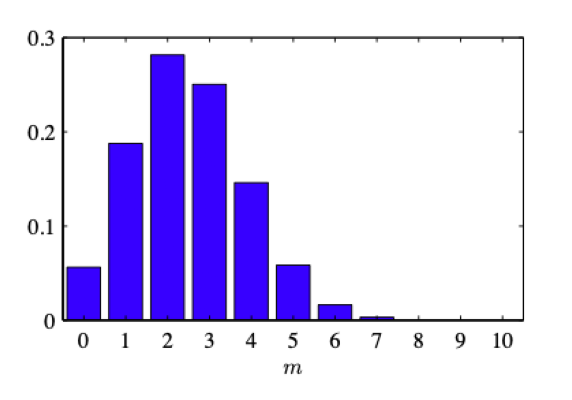

In [7]:
# 二项分布
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.1二项分布.png')
plt.axis('off')
ax.imshow(d)

根据1.10:加和的均值是均值的加和，加和的方差是方差的加和:

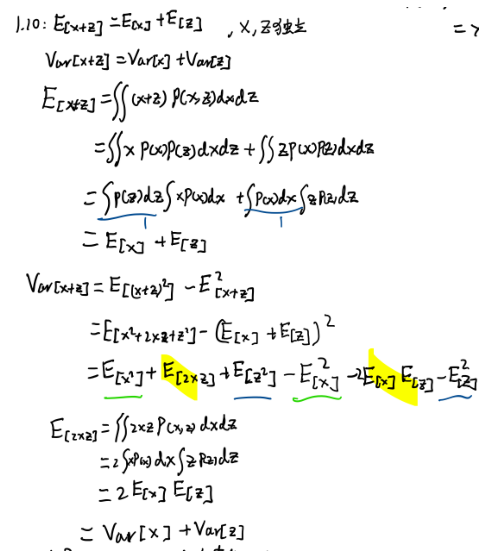

In [8]:
# 1.10
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.11.10.png')
plt.axis('off')
ax.imshow(d)

$m=x_1+...+x_N$，因此我们有:<p>

$$
\mathbb{E}[m] \equiv \sum_{m=0}^{N} m \operatorname{Bin}(m \mid N, \mu)=N \mu \tag{2.11}
$$
    
$$
\mathbb{E}[m] \equiv \sum_{m=0}^{N} (m-E[m])^2 \operatorname{Bin}(m \mid N, \mu)=N \mu(1-\mu) \tag{2.12}
$$

## 2.1.1 Beta分布
直接用最大似然，小数据集会过拟合。引入$\mu$的先验来解决。

似然是一个$ \mu^x(1-\mu)^{1-x} $的乘积形式。我们选择先验也是这样的形式的话，后验也会是这样的形式。这叫做共轭性。所以我们选择先验为Beta分布：

$$ Beta(\mu|a, b) = \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)}\mu^{a-1}(1-\mu)^{b-1} \tag{2.13} $$

其中 $$ \Gamma(x) \equiv \int_0^\infty u^{x-1}e^{-u}du $$



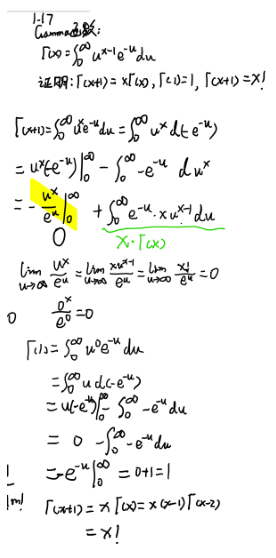

In [19]:
# Gamma函数性质
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.1.1Gamma函数性质.png')
plt.axis('off')
ax.imshow(d)

满足归一化

$$ \int_0^1 Beta(\mu|a,b)d\mu = 1 \tag{2.14} $$


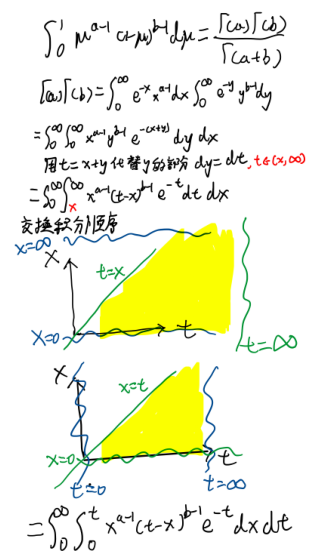

In [24]:
# 归一化证明up
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.1.1归一化证明up.png')
plt.axis('off')
ax.imshow(d)

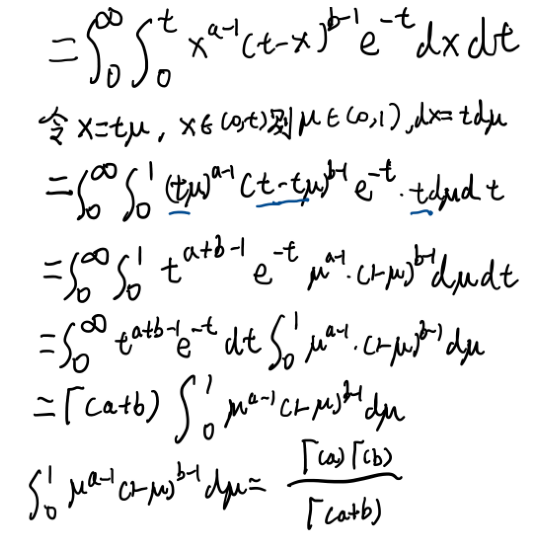

In [25]:
# 归一化证明down
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.1.1归一化证明down.png')
plt.axis('off')
ax.imshow(d)

均值和方差：
$E[\mu]= \frac{a}{a + b} \tag{2.15}$

$\ var[\mu] =\frac{ab}{(a+b)^2(a+b+1)} \tag{2.16}$
这里a和b是超参数。

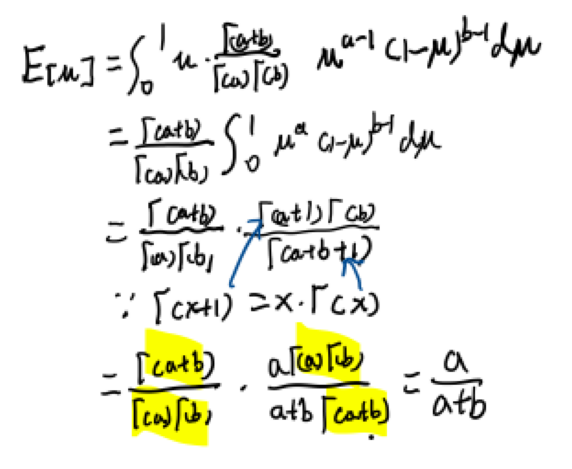

In [21]:
# 均值
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.1.1均值.png')
plt.axis('off')
ax.imshow(d)

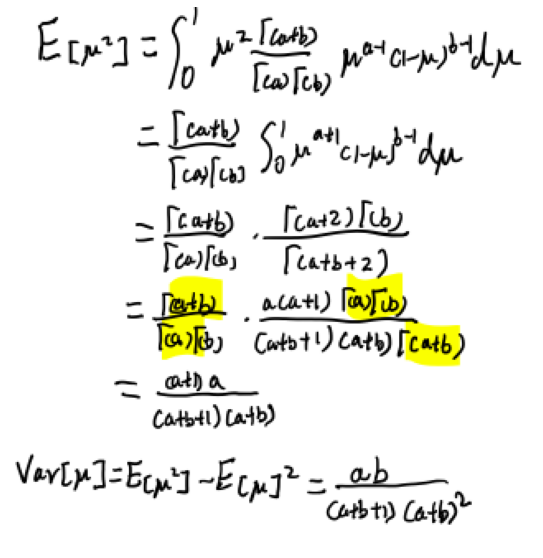

In [22]:
# 方差
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.1.1方差.png')
plt.axis('off')
ax.imshow(d)

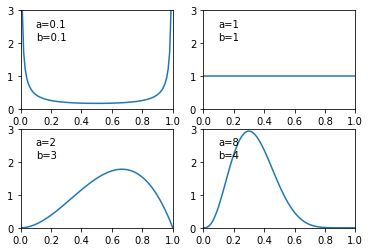

In [17]:
# 不同超参数对应图
x = np.linspace(0, 1, 100)
for i, [a, b] in enumerate([[0.1, 0.1], [1, 1], [2, 3], [8, 4]]):
    plt.subplot(2, 2, i + 1)
    beta = Beta(a, b)
    plt.xlim(0, 1)
    plt.ylim(0, 3)
    plt.plot(x, beta.pdf(x))
    plt.annotate("a={}".format(a), (0.1, 2.5))
    plt.annotate("b={}".format(b), (0.1, 2.1))
plt.show()

Beta先验2.13和二项似然函数2.9相乘，归一化，可得到：

$$ p(\mu|m,l,a,b) \propto \mu^{m+a-1}(1-\mu)^{l+b-1} \tag{2.17} $$

其中l=N-m。和先验分布的形式相同。共轭。对比2.13就可以得到归一化系数。

$$ p(\mu|m,l,a,b) = \frac{\Gamma(m+a+l+b)}{\Gamma(m+a)\Gamma(l+b)}\mu^{m+a-1}(1-\mu)^{l+b-1} \tag{2.18} $$

从先验到后验，a的值增加了m，b的值增加了l。超参数a和b叫有效观测数。再进行新的观测，这里的后验又变成下次观测的先验。

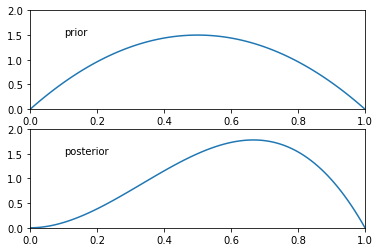

In [18]:
# 贝叶斯顺序推断
beta = Beta(2, 2)
plt.subplot(2, 1, 1)
plt.xlim(0, 1)
plt.ylim(0, 2)
plt.plot(x, beta.pdf(x))
plt.annotate("prior", (0.1, 1.5))

model = Bernoulli(mu=beta)
model.fit(np.array([1]))
plt.subplot(2, 1, 2)
plt.xlim(0, 1)
plt.ylim(0, 2)
plt.plot(x, model.mu.pdf(x))
plt.annotate("posterior", (0.1, 1.5))

plt.show()

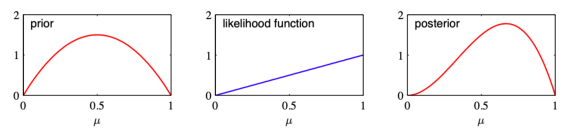

In [26]:
# 贝叶斯顺序推断
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.1.1贝叶斯顺序推断.png')
plt.axis('off')
ax.imshow(d)

先验为Beta分布，a=2,b=2,似然是2.9,其中N=m=1，后验概率是Beta分布，变成a=3,b=2.这样**顺序学习，每次有新数据，用更新过的先验来处理就可以，不需要之前的数据**。

如果我们目标是尽可能好地进行预测下一次数据，那么在给定观测数据D的情况下，x的预测分布就是：

$$ p(x=1|D) = \int_0^1p(x=1|\mu)p(\mu|D)d\mu = \int_0^1\mu p(\mu|D)d\mu = \mathbb{E}[\mu|D] \tag{2.19} $$

根据2.18和2.13的形式对应。和2.15对比，我们可以得到：

$$ p(x=1|D) = \frac{m+a}{m+a+l+b} \tag{2.20} $$

当m,l趋近于无限大，2.20变成最大似然的结果2.8.**贝叶斯后验和最大似然结果在数据趋近于无穷的情况会统一**（不仅仅在beta分布下成立，在其他分布也有这样性质）。数据没那么多，$\mu$的后验均值在先验均值和公式2.7给出的最大似然之间。(折中)

在图中，当观测数量增多，后验分布更尖了。2.16的公式给出的方差也可以看书，a或b趋近于无穷的时候，方差就趋于零。**观测点增加，后验的不确定性下降**

我们用频率学角度证明这点。考虑一个贝叶斯推断，参数为$\theta$并且观测了一个数据集D，由联合分布$p(\theta,D)$表示.

$$ \mathbb{E}_\theta[\theta] = \mathbb{E}_D[\mathbb{E}_\theta[\theta|D]] \tag{2.21} $$ 

其中 
$ \mathbb{E}_\theta[\theta] = \int p(\theta)\theta d\theta \tag{2.22}$

$$
\mathbb{E}_{\mathcal{D}}\left[\mathbb{E}_{\boldsymbol{\theta}}[\boldsymbol{\theta} \mid \mathcal{D}]\right] \equiv \int\left\{\int \boldsymbol{\theta} p(\boldsymbol{\theta} \mid \mathcal{D}) \mathrm{d} \boldsymbol{\theta}\right\} p(\mathcal{D}) \mathrm{d} \mathcal{D}
\tag{2.23} $$

$ \theta $的后验均值（在产生数据集的分布上的平均）等于$ \theta $的先验均值。同样的我们可以得到：

$$ var_\theta[\theta] = \mathbb{E}_D[var_\theta[\theta|D]] + var_D[\mathbb{E}_\theta[\theta|D]] \tag{2.24} $$

公式（2.24）中左边是$ \theta $的先验方差。右边的第一项是$ \theta $的后验方差的均值。第二项是$ \theta $的后验均值的方差。因为方差是一个正的量（第二项大于零），所以一般来说，$ \theta $的后验方差小于先验方差。后验均值的方差越大，这个差值的就越大。注意，这个结果只在通常情况下成立，对于特定的观测数据集，后验方差有可能大于先验方差。

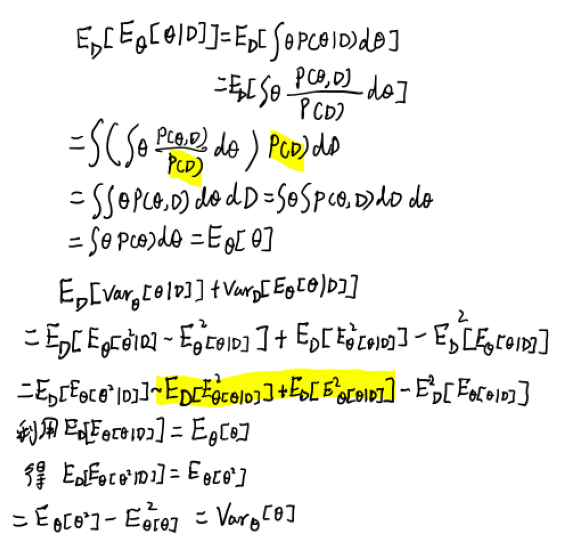

In [23]:
# 频率学证明
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.1.1频率学证明.png')
plt.axis('off')
ax.imshow(d)

## 2.2多项式变量
二元变量：2个状态。推广到k个互斥状态。用one-hot表示。比如K=6，$x_3=1$：

$$ x = (0, 0, 1, 0, 0, 0)^T \tag{2.25} $$

向量满足$\sum_{k=1}^K x_k = 1 $。如果用参数$ \mu_k $来标记$ x_k = 1 $的概率，那么我们就得到$ x $的分布：

$$ p(x|\mu) = \prod\limits_{k=1}^K\mu_k^{x_k} \tag{2.26} $$

其中$\mu = (\mu_1,...,\mu_K)^T $，由于参数$ \mu_k $表示概率，所以需要满足$\mu_k \geq 0 $且$ \sum_k\mu_k = 1 $。公式（2.26）分布可以看作伯努利分布在多于两种输出时的泛化。很容易证明这个分布是标准化的。

$ \sum\limits_xp(x|\mu) = \sum\limits_{k=1}^K\mu_k = 1 \tag{2.27} $

且

$ \mathbb{E}[x|\mu] = \sum\limits_xp(x|\mu)x = (\mu_1,...,\mu_M)^T = \mu \tag{2.28} $

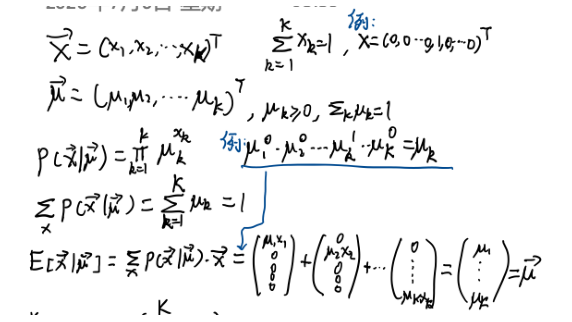

In [3]:
# 多项式变量
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.2多项式变量.png')
plt.axis('off')
ax.imshow(d)

考虑一个有$ N $个独立观测值$ x_1,...,x_N $的数据集$ D $。其对应的似然函数的形式为

$$ p(D|\mu) = \prod\limits_{n=1}^N\prod\limits_{k=1}^K\mu_k^{x_{nk}} = \prod\limits_{k=1}^K\mu_k^{(\sum_nx_{nk})} = \prod\limits_{k=1}^K\mu_k^{m_k} \tag{2.29} $$

令：

$ m_k = \sum\limits_n x_{nk} \tag{2.30} $ 
它表示观测到$ x_k = 1 $的次数。这些别称为这个分布的充分统计量。


求最大似然解，我们需要在$ \mu_k $的和等于1的约束下，关于$\mu_k $最大化$ \ln p(D|\mu) $。这可以通过拉格朗日乘数法得到，即：

$ \sum\limits_{k=1}^{K}m_k\ln\mu_k + \lambda(\sum\limits_{k=1}^K\mu_k - 1 ) \tag{2.31} $

对公式（2.31）关于$ \mu_k $求导并使之等于0得到：

$ \mu_k = -m_k / \lambda \tag{2.32} $

把公式（2.32）代入限制条件$ \sum_k\mu_k = 1 $，可得$ \lambda = -N $。所以我们的最大似然解：

$$ \mu_k^{ML} = \frac{m_k}{N} \tag{2.33} $$

就是观测$x_k = 1$出现占总观测的比例。



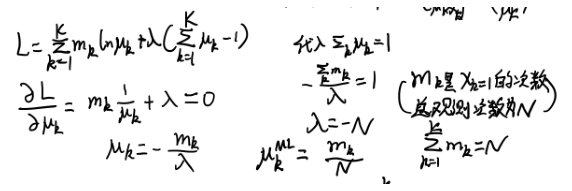

In [4]:
# 最大似然
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.2最大似然.png')
plt.axis('off')
ax.imshow(d)

考虑$ m_1,...,m_K $在参数$ \mu $和观测总数N条件下联合分布。通过公式（2.29）得到：

$ Mult(m_1,...,m_k|\mu,N) = \binom{N}{m_1m_2...m_k}\prod\limits_{k=1}^K\mu_k^{m_k} \tag{2.34} $

这就是多项式分布。标准化系数是把N个物体分成大小为$$ m_1,...,m_K $$的K组的方案总数，定义为

$$ \binom{N}{m_1m_2...m_k} = \frac{N!}{m_1!m_2!...m_k!} \tag{2.35} $$

$ m_k $满足下面的约束：
$$ \sum\limits_{k=1}^Km_k = N \tag{2.36} $$

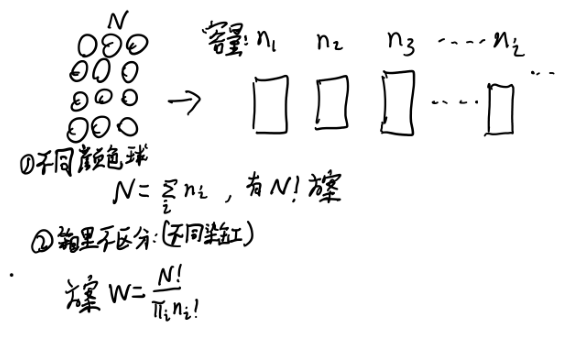

In [2]:
# 小球染缸
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/1.6小球图示.png')
plt.axis('off')
ax.imshow(d)

In [5]:
model = Categorical()
model.fit(np.array([[0, 1, 0], [1, 0, 0], [1, 0, 0], [0, 0, 1]]))
print(model)

Categorical(
    mu=[0.5  0.25 0.25]
)


## 2.2.1狄利克雷分布
多项式分布参数$ {\mu_k} $的一组先验分布。观察多项式分布的公式，得到共轭先验：
$ p(\mu|\alpha) \propto \prod\limits_{k=1}^{K}\mu_k^{\alpha_k - 1} \tag{2.37}$

其中$ 0 \leq \mu_k \leq 1 , \sum_k\mu_k = 1 $，$ (\alpha_1,...,\alpha_K)^T $记作$ \alpha $是分布的参数。注意，由于总和的限制，$ {\mu_k} $空间上的分布被限制在$ K − 1 $维的单纯形中。图2.4展示了$ K = 3 $的情形。

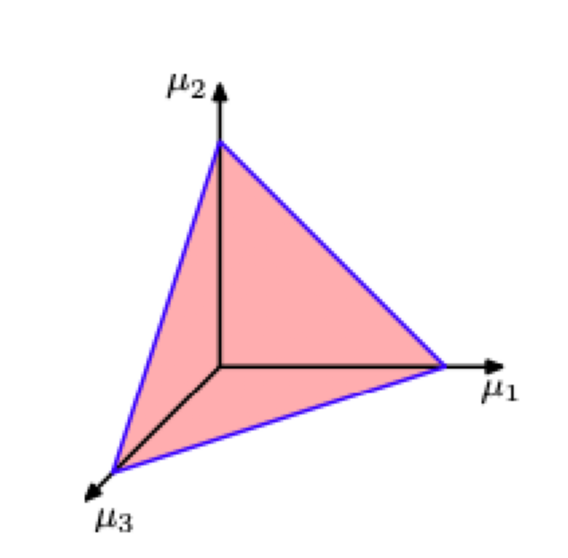

In [9]:
# 单纯形
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.2.1单纯形.png')
plt.axis('off')
ax.imshow(d)

归一化得到:(归纳法，习题2.9有思路)

$$ Dir(\mu|\alpha) = \frac{\Gamma(\alpha_0)}{\Gamma(\alpha_1)...\Gamma(\alpha_K)}\prod\limits_{k=1}^K\mu_k^{\alpha_k - 1} \tag{2.38} $$

狄利克雷分布。而且：

$$ \alpha_0 = \sum\limits_{k=1}^K\alpha_k \tag{2.39} $$

图2.5有不同参数下的图像：分布对应$$ {\alpha_k} = 0.1, {\alpha_k} = 1, {\alpha_k} = 10 $$。

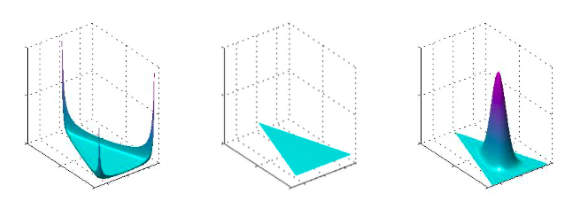

In [12]:
# 不同参数下图像
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.2.1不同参数下的图像.png')
plt.axis('off')
ax.imshow(d)

用似然2.34乘先验2.38就得到后验，形式为：
$$ p(\mu|D,\alpha) \propto p(D|\mu)p(\mu|\alpha) \propto \prod\limits_{k=1}^K\mu_k^{\alpha_k + m_k - 1} \tag{2.40} $$

因为形式与先验相同，对比写出归一化系数：

$$ \begin{eqnarray} p(\mu|D, \alpha) &=& Dir(\mu|\alpha + m) \ &=& \frac{\Gamma(\alpha_0 + N)}{\Gamma(\alpha_1+m_1)...+\Gamma(\alpha_K+m_K)}\prod\limits_{k=1}^K\mu_k^{\alpha_k + m_k - 1} \tag{2.41} \end{eqnarray} $$

其中$ m = (m_1,...,m_K)^T $。与二项分布的beta先验一样，可以把狄利克雷分布参数$ \alpha_k $当成观测到$ x_k = 1 $的数量。而二元变量就是多项式变量的一个特例。

In [6]:
mu = Dirichlet(alpha=np.ones(3))
model = Categorical(mu=mu)
print(model)

model.fit(np.array([[1., 0., 0.], [1., 0., 0.], [0., 1., 0.]]))
print(model)

Categorical(
    mu=Dirichlet(
        alpha=[1. 1. 1.]
    )
)
Categorical(
    mu=Dirichlet(
        alpha=[3. 2. 1.]
    )
)


## 2.3 高斯分布
单变量x，

$\mathcal{N}\left(x | \mu, \sigma^{2}\right)=\frac{1}{\left(2 \pi \sigma^{2}\right)^{\frac{1}{2}}} \exp \left\{-\frac{1}{2 \sigma^{2}}(x-\mu)^{2}\right\} \tag{2.42} $

D维向量x，

$$ \mathcal{N}(x|\mu, \Sigma) = \frac{1}{(2\pi)^{D/2}} \frac{1}{|\Sigma|^{1/2}} exp\{-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x - \mu)\} \tag{2.43} $$


不同理解角度：

・熵取得最大值的是高斯分布。<p>
・一组随机变量之和，概率分布随着项（随机变量个数）增加趋近于高斯分布。（拉普拉斯中心极限定理）比如均匀分布还有之前的二项分布

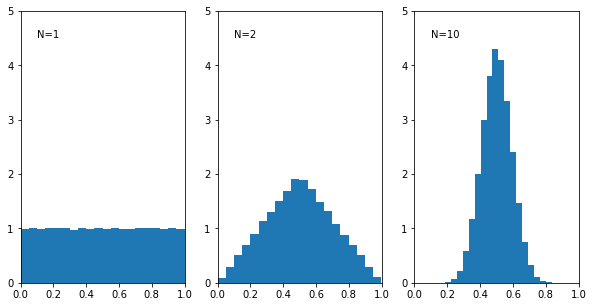

In [3]:
# 均匀分布
uniform = Uniform(low=0, high=1)
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.xlim(0, 1)
plt.ylim(0, 5)
plt.annotate("N=1", (0.1, 4.5))
plt.hist(uniform.draw(100000), bins=20, density=True)

plt.subplot(1, 3, 2)
plt.xlim(0, 1)
plt.ylim(0, 5)
plt.annotate("N=2", (0.1, 4.5))
plt.hist(0.5 * (uniform.draw(100000) + uniform.draw(100000)), bins=20, density=True)

plt.subplot(1, 3, 3)
plt.xlim(0, 1)
plt.ylim(0, 5)
sample = 0
for _ in range(10):
    sample = sample + uniform.draw(100000)
plt.annotate("N=10", (0.1, 4.5))
plt.hist(sample * 0.1, bins=20, density=True)

plt.show()

这节介绍高斯函数的性质。首先是高斯分布的几何形式，高斯对于x的依赖是通过下面二次型的形式：<p>
$$ \Delta^2 = (X-\mu)^T\Sigma^{-1}(X-\mu) \tag{2.44} $$
    
这里$\Delta$就是$x和\mu$之间的马氏距离。当$\Sigma$是单位矩阵时候就是欧式距离。x空间中这个二次型是常数曲面，高斯分布是常数。

矩阵$\Sigma$可以取为对称矩阵，而不失去一般性，因为任何非对称项都会从指数中消失。

现在考虑协方差矩阵的特征向量方程：

$$ \Sigma u_i = \lambda_iu_i \tag{2.45} $$

其中$ i = 1,...,D $。因为$ \Sigma $是实对称矩阵，所以它的特征值也是实数，特征向量可以是单位正交，得到：

$ u_i^Tu_j = I_{ij} \tag{2.46} $

其中$ I_{ij} $是单位矩阵的第$ i,j $个元素，满足：

$$
I_{i j}=\left\{\begin{array}{ll}
1, & \text { 如果 } i=j \\
0, & \text { 其他情况 }
\end{array}\right. \tag{2.47}
$$
也就是相同为1，不同为0.

协方差矩阵$ \Sigma $可以表示成特征向量的展开的形式：

$$ \Sigma = \sum\limits_{i=1}^D\lambda_iu_iu_i^T \tag{2.48} $$

同样的协方差的逆矩阵$ \Sigma^{-1} $可以表示为

$$ \Sigma^{-1} = \sum\limits_{i=1}^D\frac{1}{\lambda_i}u_iu_i^T \tag{2.49} $$

公式（2.49）代入（2.44），可以把二次型表示为：

$$ \Delta^2 = \sum\limits_{i=1}^D \frac{y_i^2}{\lambda_i} \tag{2.50} $$

其中

$$ y_i = u_i^T(x - \mu) \tag{2.51} $$ 

我们可以把$ {y_i} $解释为由正交向量$ u_i $关于原来的$ x_i $坐标系平移和旋转之后得到的新坐标系。记$ Y = (y_1,...,y_D)^T $，可得：

$$ Y = U(X - \mu) \tag{2.52} $$

其中$ U $是由行向量$ u_i^T $组成的。根据公式（2.46）可得$ U $是正交矩阵，即它满足$UU^T = I, U^TU = I $,其中$ I $是单位矩阵。
 


如果公式（2.50）是常数时，那么二次型和高斯密度在曲面上为常数。如果所有特征值$ \lambda_i $都是正的，那么这些曲面是中心位于$ \mu $，轴方向为$ u_i $，轴方向的缩放比例为$ \lambda_i^{1/2} $的椭球面，如图2.7所示。
   

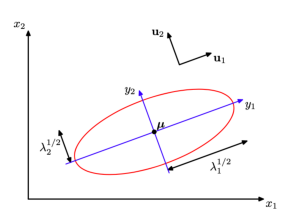

In [10]:
# 椭球
fig, ax = plt.subplots(figsize=(5, 5))
d = plt.imread('./graph/2.3椭球.png')
plt.axis('off')
ax.imshow(d)

协方差矩阵的所有特征值都严格大于零，为了正确归一化。这就是正定矩阵。(2.57解释)

如果所有特值都是非负的，就是半正定矩阵。

现在考虑y定义下的高斯分布形式，就是进行了一次坐标变化，Jacobian矩阵的元素为：

$$ J_{ij} = \frac{\partial x_i}{\partial y_j} = U_{ji} \tag{2.53} $$

其中$ U_{ji} $是矩阵$ U^T $的元素。有矩阵$ U $的正交性，可得

$$ |J|^2 = |U^T|^2 = |U^T||U| = |U^TU| = |I| = 1 \tag{2.54} $$

由此可得$ |J| = 1 $。且协方差矩阵的行列式$ |\Sigma| $可以写成特征值的乘积：

$$ |\Sigma|^{1/2} = \prod\limits_{j=1}^D \lambda_j^{1/2} \tag{2.55} $$

因此，在$ y_j $坐标系下，高斯分布由以下形式：

$$
p(\boldsymbol{y})=p(\boldsymbol{x})|\boldsymbol{J}|=\prod_{j=1}^{D} \frac{1}{\left(2 \pi \lambda_{j}\right)^{\frac{1}{2}}} \exp \left\{-\frac{y_{j}^{2}}{2 \lambda_{j}}\right\} \tag{2.56}
$$

它具有归一化：
$$
\int p(\boldsymbol{y}) \mathrm{d} \boldsymbol{y}=\prod_{j=1}^{D} \int_{-\infty}^{\infty} \frac{1}{\left(2 \pi \lambda_{j}\right)^{\frac{1}{2}}} \exp \left\{-\frac{y_{j}^{2}}{2 \lambda_{j}}\right\} \mathrm{d} y_{j}=1 \tag{2.57}
$$


期望：
$$
\begin{aligned}
\mathbb{E}[\boldsymbol{x}] &=\frac{1}{(2 \pi)^{\frac{D}{2}}} \frac{1}{|\mathbf{\Sigma}|^{\frac{1}{2}}} \int \exp \left\{-\frac{1}{2}(\boldsymbol{x}-\boldsymbol{\mu})^{T} \boldsymbol{\Sigma}^{-1}(\boldsymbol{x}-\boldsymbol{\mu})\right\} \boldsymbol{x} \mathrm{d} \boldsymbol{x} \\
&=\frac{1}{(2 \pi)^{\frac{D}{2}}} \frac{1}{|\boldsymbol{\Sigma}|^{\frac{1}{2}}} \int \exp \left\{-\frac{1}{2} \boldsymbol{z}^{T} \boldsymbol{\Sigma}^{-1} \boldsymbol{z}\right\}(\boldsymbol{z}+\boldsymbol{\mu}) \mathrm{d} \boldsymbol{z}
\end{aligned} \tag{2.58}
$$
用$z=x-\mu$替换
$$ \mathbb{E}[X] = \mu \tag{2.59} $$

二阶矩是：
$$
\begin{aligned}
\mathbb{E}\left[\boldsymbol{x} \boldsymbol{x}^{T}\right] &=\frac{1}{(2 \pi)^{\frac{D}{2}}} \frac{1}{|\mathbf{\Sigma}|^{\frac{1}{2}}} \int \exp \left\{-\frac{1}{2}(\boldsymbol{x}-\boldsymbol{\mu})^{T} \boldsymbol{\Sigma}^{-1}(\boldsymbol{x}-\boldsymbol{\mu})\right\} \boldsymbol{x} \boldsymbol{x}^{T} \mathrm{d} \boldsymbol{x} \\
&=\frac{1}{(2 \pi)^{\frac{D}{2}}} \frac{1}{|\boldsymbol{\Sigma}|^{\frac{1}{2}}} \int \exp \left\{-\frac{1}{2} \boldsymbol{z}^{T} \boldsymbol{\Sigma}^{-1} z\right\}(\boldsymbol{z}+\boldsymbol{\mu})(\boldsymbol{z}+\boldsymbol{\mu})^{T} \mathrm{d} \boldsymbol{z}
\end{aligned}
$$

$也用z=x-\mu$来替换。交叉项$\mu z^T和z\mu^T$因为对称性抵消，$\mu\mu^T$为常数可以拿出，本身又是单位向量被归一化。对于$zz^T$项，我们可以得到
$$ z = \sum\limits_{j=1}^Dy_ju_j \tag{2.60} $$

其中$ y_j = u_j^Tz $

推出：
$$
\begin{aligned}
\frac{1}{(2 \pi)^{\frac{D}{2}}} & \frac{1}{|\mathbf{\Sigma}|^{\frac{1}{2}}} \int \exp \left\{-\frac{1}{2} \boldsymbol{z}^{T} \mathbf{\Sigma}^{-1} \boldsymbol{z}\right\} \boldsymbol{z} \boldsymbol{z}^{T} \mathrm{d} \boldsymbol{z} \\
&=\frac{1}{(2 \pi)^{\frac{D}{2}}} \frac{1}{|\mathbf{\Sigma}|^{\frac{1}{2}}} \sum_{i=1}^{D} \sum_{j=1}^{D} \boldsymbol{u}_{i} \boldsymbol{u}_{j}^{T} \int \exp \left\{-\sum_{k=1}^{D} \frac{y_{k}^{2}}{2 \lambda_{k}}\right\} y_{i} y_{j} \mathrm{d} \boldsymbol{y} \\
&=\sum_{i=1}^{D} \boldsymbol{u}_{i} \boldsymbol{u}_{i}^{T} \lambda_{i}=\boldsymbol{\Sigma}
\end{aligned} \tag{2.61}
$$


所以
$$ \mathbb{E}[XX^T] = \mu\mu^T + \Sigma \tag{2.62} $$
所以
$$ var[X] = \mathbb{E}[(X - \mathbb{E}[X])(X - \mathbb{E}[X])^T] \tag{2.63} $$
$$ var[X] = \Sigma $$



高斯分布的问题，参数太多，平方增长，无法求逆。
- 一个对称协方差$\Sigma$有$D(D+1)/2$个参数,$\mu$有D个参数，一共$D(D+3)/2$个参数。
- 一个对角协方差矩阵$\Sigma=diag(\sigma_i^2)$，一共2D个参数
- 再正比于单位矩阵$\Sigma=\sigma^2I$,一共D+1个参数。
常数概率密度轮廓线如下

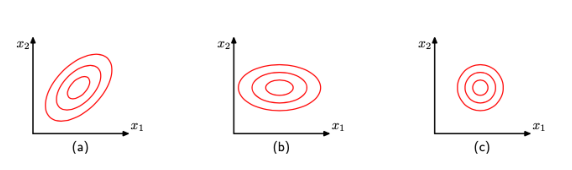

In [12]:
# 常数概率密度轮廓线
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.3常数概率密度.png')
plt.axis('off')
ax.imshow(d)

另一局限性是单峰的，不能近似多峰问题，可以近似的概率有限。

引入潜在变量，来解决>HMM，卡尔曼滤波器，马尔可夫随机场之类的。

## 2.3.1条件高斯分布
多元高斯性质：两个变量的联合高斯分布，一个变量为条件的高斯分布也是高斯分布。边缘高斯分布也是高斯分布。这节看条件高斯分布。

假设$x $是服从高斯分布$ \mathcal{N}(x|\mu, \Sigma) $的$D $维向量，把$ x $划分为两个不相交的子集$ x_a, x_b $。令$ x_a $为$ x $的前$ M $个分量，令$ x_b $为剩余的$ D − M $个分量，得到：
$$
\boldsymbol{x}=\left(\begin{array}{l}
\boldsymbol{x}_{a} \\
\boldsymbol{x}_{b}
\end{array}\right) \tag{2.65}
$$

$$
\boldsymbol{\mu}=\left(\begin{array}{l}
\boldsymbol{\mu}_{a} \\
\boldsymbol{\mu}_{b}
\end{array}\right) \tag{2.66}
$$


$$
\boldsymbol{\Sigma}=\left(\begin{array}{cc}
\boldsymbol{\Sigma}_{a a} & \boldsymbol{\Sigma}_{a b} \\
\boldsymbol{\Sigma}_{b a} & \boldsymbol{\Sigma}_{b b}
\end{array}\right) \tag{2.67} $$

协方差矩阵是对称的即$ \Sigma^T = \Sigma $，可得$\Sigma_{aa},\Sigma_{bb} $也是对称的，且$ \Sigma_{ba} = \Sigma_{ab}^T $。

在很多情况下，使用协方差的逆矩阵会比较方便，记：

$$ \Lambda \equiv \Sigma^{-1} \tag{2.68} $$

这被称为精度矩阵（precision matrix）。
$$
\boldsymbol{\Lambda}=\left(\begin{array}{cc}
\boldsymbol{\Lambda}_{a a} & \boldsymbol{\Lambda}_{a b} \\
\boldsymbol{\Lambda}_{b a} & \boldsymbol{\Lambda}_{b b}
\end{array}\right) \tag{2.69} $$


因为对称矩阵的逆同样是对称的，所以$ \Lambda_{aa},\Lambda_{bb} $也是对称的，且$ \Lambda_{ab}^T = \Lambda_{ba} $。需要强调的一点是：$ \Lambda_{aa} $不单单是对$ \Sigma_{aa} $求逆这么简单。


首先，找到条件分布$ p(x_a|x_b) $的条件分布。根据概率的乘法规则，由联合分布 $ p(x) = p(x_a, x_b) $通过固定$ x_b $为观测到的值，然后标准化所得到的表达式就可以得到$ x_a $上的有效概率。

简单说就是先算二次型，再算系数。确定均值和方差。

二次型：
$$ \begin{eqnarray} &-\frac{1}{2}&(x-\mu)^T\Sigma^{-1}(x-\mu) = \ &-\frac{1}{2}&(x_a - \mu_a)^T\Lambda_{aa}(x_a - \mu_a) -\frac{1}{2}(x_a - \mu_a)^T\Lambda_{ab}(x_b - \mu_b) \ &-\frac{1}{2}&(x_b - \mu_b)^T\Lambda_{ba}(x_a - \mu_a) -\frac{1}{2}(x_b - \mu_b)^T\Lambda_{bb}(x_b - \mu_b) \tag{2.70} \end{eqnarray} $$

把它看成$ x_a $的函数，这又是一个二次型，可以推出对应的条件分布$ p(x_a|x_b) $是高斯分布。

一个通用的的高斯分布$ \mathcal{N}(x|\mu, \Sigma) $的指数项可以写成：

$$ -\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu) = -\frac{1}{2}x^T\Sigma^{-1}x + x^T\Sigma^{-1}\mu + const \tag{2.71} $$

然后直接对应系数就可以求得均值和方差。

如果我们选出所有$x_a $的二阶项，就有：

$$ -\frac{1}{2}x_a^T\Lambda_{aa}x_a \tag{2.72} $$

从这个公式中可以得到，$ p(x_a|x_b) $的协方差（精度矩阵的逆）：

$$ \Sigma_{a|b} = \Lambda_{aa}^{-1} \tag{2.73} $$


现在，考虑式（2.70）中$ x_a $的所有线性项：

$$
\boldsymbol{x}_{a}^{T}\left\{\boldsymbol{\Lambda}_{a a} \boldsymbol{\mu}_{a}-\boldsymbol{\Lambda}_{a b}\left(\boldsymbol{x}_{b}-\boldsymbol{\mu}_{b}\right)\right\}
\tag{2.74}$$

所以，
$$
\begin{aligned}
\boldsymbol{\mu}_{a \mid b} &=\boldsymbol{\Sigma}_{a \mid b}\left\{\boldsymbol{\Lambda}_{a a} \boldsymbol{\mu}_{a}-\boldsymbol{\Lambda}_{a b}\left(\boldsymbol{x}_{b}-\boldsymbol{\mu}_{b}\right)\right\} \\
&=\boldsymbol{\mu}_{a}-\boldsymbol{\Lambda}_{a a}^{-1} \boldsymbol{\Lambda}_{a b}\left(\boldsymbol{x}_{b}-\boldsymbol{\mu}_{b}\right)
\end{aligned} \tag{2.75}
$$

然后将精度矩阵替换回协方差矩阵：

用：
$$
\left(\begin{array}{cc}
\boldsymbol{A} & \boldsymbol{B} \\
\boldsymbol{C} & \boldsymbol{D}
\end{array}\right)^{-1}=\left(\begin{array}{cc}
\boldsymbol{M} & -\boldsymbol{M} \boldsymbol{B} \boldsymbol{D}^{-1} \\
-\boldsymbol{D}^{-1} \boldsymbol{C M} & \boldsymbol{D}^{-1}+\boldsymbol{D}^{-1} \boldsymbol{C M B D}^{-1}
\end{array}\right)
\tag{2.76}
$$

其中$$ M = (A - BD^{-1}C)^{-1} \tag{2.77} $$

$ M^{-1} $是式（2.76）左手边矩阵关于矩阵$ D $的（Schur complement）。


$$
\begin{array}{c}
\boldsymbol{\Lambda}_{a a}=\left(\boldsymbol{\Sigma}_{a a}-\boldsymbol{\Sigma}_{a b} \boldsymbol{\Sigma}_{b b}^{-1} \boldsymbol{\Sigma}_{b a}\right)^{-1} \\ \tag{2.79,2.80}
\boldsymbol{\Lambda}_{a b}=-\left(\boldsymbol{\Sigma}_{a a}-\boldsymbol{\Sigma}_{a b} \boldsymbol{\Sigma}_{b b}^{-1} \boldsymbol{\Sigma}_{b a}\right)^{-1} \boldsymbol{\Sigma}_{a b} \boldsymbol{\Sigma}_{b b}^{-1}
\end{array} 
$$

从这些公式中，得到条件概率$$ p(x_a|x_b) $$的均值和方差的表达式为
$$
\begin{array}{c}
\boldsymbol{\mu}_{a \mid b}=\boldsymbol{\mu}_{a}+\boldsymbol{\Sigma}_{a b} \boldsymbol{\Sigma}_{b b}^{-1}\left(\boldsymbol{x}_{b}-\boldsymbol{\mu}_{b}\right) \\ \tag{2.81, 2.82}
\boldsymbol{\Sigma}_{a \mid b}=\boldsymbol{\Sigma}_{a a}-\boldsymbol{\Sigma}_{a b} \boldsymbol{\Sigma}_{b b}^{-1} \boldsymbol{\Sigma}_{b a}
\end{array}
$$

均值是$x_b$的线性函数。

## 2.3.2边缘高斯分布
联合分布是高斯$ p(x_a, x_b) $，推出条件分布$ p(x_a|x_b) $是高斯和边缘分布是高斯。

$$ p(x_a) = \int p(x_a, x_b)dx_b \tag{2.83} $$

利用二次型也可以来确定均值和方差。

目标是积掉$x_b$，只提出2.70里面的$x_b$项，然后配方。


$$ -\frac{1}{2}x_b^T\Lambda_{bb}x_b + x_b^Tm = -\frac{1}{2}(x_b-\Lambda_{bb}^{-1}m)^T\Lambda_{bb}(x_b-\Lambda_{bb}^{-1}m) + \frac{1}{2}m^T\Lambda_{bb}^{-1}m \tag{2.84} $$

其中

$$ m = \Lambda_{bb}\mu_b - \Lambda_{ba}(x_a - \mu_a) \tag{2.85} $$

带入2.83，然后先只看有$x_b$项。得到未归一化的高斯形式,与均值无关：

$$
\int \exp \left\{-\frac{1}{2}\left(\boldsymbol{x}_{b}-\boldsymbol{\Lambda}_{b b}^{-1} \boldsymbol{m}\right)^{T} \boldsymbol{\Lambda}_{b b}\left(\boldsymbol{x}_{b}-\boldsymbol{\Lambda}_{b b}^{-1} \boldsymbol{m}\right)\right\} \mathrm{d} \boldsymbol{x}_{b} \tag{2.86}
$$

$x_b$就积分积掉了。再看剩余的第二项，与2.70中$x_a$相关的集合，写出


$$ \begin{eqnarray} &\frac{1}{2}&\left[\Lambda_{bb}\mu_b - \Lambda_{ba}(x_a - \mu_a)\right]^T\Lambda_{bb}^{-1}\left[\Lambda_{bb}\mu_b - \Lambda_{ba}(x_a - \mu_a)\right] \ & & -\frac{1}{2}x_a^T\Lambda_{aa}x_a + x_a^T(\Lambda_{aa}\mu_a + \Lambda_{ab}\mu_b) + const \ &=& -\frac{1}{2}x_a^T(\Lambda_{aa} - \Lambda_{ab}\Lambda_{bb}^{-1}\Lambda_{ba})x_a \ & & + x_a^T(\Lambda_{aa} - \Lambda_{ab}\Lambda_{bb}^{-1}\Lambda_{ba})^{-1}\mu_a + const \tag{2.87} \end{eqnarray} $$

常数是与$x_a$无关项。

与2.71比较写出均值和协方差：
$$ \Sigma_a = (\Lambda_{aa} - \Lambda_{ab}\Lambda_{bb}^{-1}\Lambda_{ba})^{-1} \tag{2.88} $$

$$ \Sigma_a(\Lambda_{aa} - \Lambda_{ab}\Lambda_{bb}^{-1}\Lambda_{ba})\mu_a = \mu_a \tag{2.89} $$





再将精度矩阵换回协方差矩阵
$$
\begin{aligned}
\mathbb{E}\left[\boldsymbol{x}_{a}\right] &=\boldsymbol{\mu}_{a} \\
\operatorname{cov}\left[\boldsymbol{x}_{a}\right] &=\boldsymbol{\Sigma}_{a a}
\end{aligned} \tag{2.92,2.93}
$$

**简洁**

分区高斯的边缘或条件分布总结如下：

对于联合高斯分布$$ \mathcal{N}(x|\mu,\Sigma) , \Lambda \equiv \Sigma^{-1} $$如果拆成两块。
$$
\begin{aligned}
\boldsymbol{x} &=\left(\begin{array}{c}
\boldsymbol{x}_{a} \\
\boldsymbol{x}_{b}
\end{array}\right), & \boldsymbol{\mu}=\left(\begin{array}{c}
\boldsymbol{\mu}_{a} \\
\boldsymbol{\mu}_{b}
\end{array}\right) \\
\boldsymbol{\Sigma}=\left(\begin{array}{cc}
\mathbf{\Sigma}_{a a} & \boldsymbol{\Sigma}_{a b} \\
\boldsymbol{\Sigma}_{b a} & \boldsymbol{\Sigma}_{b b}
\end{array}\right), & \boldsymbol{\Lambda}=\left(\begin{array}{cc}
\boldsymbol{\Lambda}_{a a} & \boldsymbol{\Lambda}_{a b} \\
\boldsymbol{\Lambda}_{b a} & \boldsymbol{\Lambda}_{b b}
\end{array}\right)
\end{aligned} \tag{2.94,2.95}
$$
条件分布：
$$ p(x_a|x_b) = \mathcal{N}(x|\mu_{a|b}, \Lambda_{aa}^{-1}) \tag{2.96} $$ $$ \mu_{a|b} = \mu_a - \Lambda_{aa}^{-1}\Lambda_{ab}(x_a - \mu_b) \tag{2.97} $$

边缘分布：
$$ p(x_a) = \mathcal{N}(x_a|\mu_a, \Sigma_{aa}) \tag{2.98} $$

图2.9展示涉及到两个变量的多元高斯分布的条件概率分布和边缘概率分布

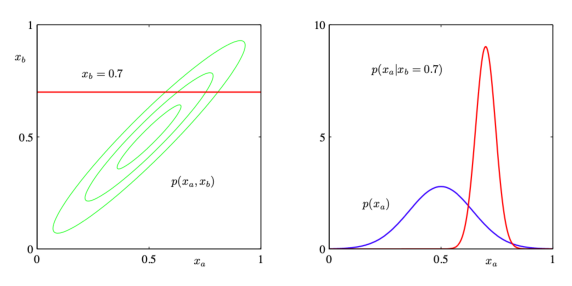

In [14]:
# 2.9
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.3.2概率图.png')
plt.axis('off')
ax.imshow(d)

## 2.3.3 高斯变量的贝叶斯定理
假设给定高斯边缘分布$ p(x) $和均值是关于$ x $的线性函数且方差与$ x $无关的高斯条件分布$ p(y|x) $。这是线性高斯模型（linear Gaussian model）的一个例子。

把边缘和条件分布记为：
$$
\begin{array}{r}
p(\boldsymbol{x})=\mathcal{N}\left(\boldsymbol{x} \mid \boldsymbol{\mu}, \boldsymbol{\Lambda}^{-1}\right) \\
p(\boldsymbol{y} \mid \boldsymbol{x})=\mathcal{N}\left(\boldsymbol{y} \mid \boldsymbol{A} \boldsymbol{x}+\boldsymbol{b}, \boldsymbol{L}^{-1}\right)
\end{array} \tag{2.99,2.100}
$$

其中$ \mu, A, b $是控制均值的参数，$ \Lambda , L $是精度矩阵。设$ x,y $分别是$ M,D $维的，那么矩阵$ A $是$ D \times M $矩阵。




首先求x，y的联合分布。

$$ z = \left( \begin{array}{c} 
x \\ y \end{array} \right) \tag{2.101} $$

求对数：

$$ \begin{eqnarray} \ln p(z) &=& \ln p(x) + \ln p(y|x) \ &=& -\frac{1}{2}(x - \mu)^T\Lambda(x-\mu) \ & & -\frac{1}{2}(y-Ax-b)^TL(y-Ax-b) + const \tag{2.102} \end{eqnarray} $$

常数是与x，y无关的项。z的分量的二次函数》高斯函数。

为了计算高斯分布的**精度**，看二阶项：
$$
-\frac{1}{2} \boldsymbol{x}^{T}\left(\boldsymbol{\Lambda}+\boldsymbol{A}^{T} \boldsymbol{L} \boldsymbol{A}\right) \boldsymbol{x}-\frac{1}{2} \boldsymbol{y}^{T} \boldsymbol{L} \boldsymbol{y}+\frac{1}{2} \boldsymbol{y}^{T} \boldsymbol{L} \boldsymbol{A} \boldsymbol{x}+\frac{1}{2} \boldsymbol{x}^{T} \boldsymbol{A}^{T} \boldsymbol{L} \boldsymbol{y}
$$
$$
=-\frac{1}{2}\left(\begin{array}{c}
\boldsymbol{x} \\
\boldsymbol{y}
\end{array}\right)^{T}\left(\begin{array}{cc}
\boldsymbol{\Lambda}+\boldsymbol{A}^{T} \boldsymbol{L} \boldsymbol{A} & -\boldsymbol{A}^{T} \boldsymbol{L} \\
-\boldsymbol{L} \boldsymbol{A} & \boldsymbol{L}
\end{array}\right)\left(\begin{array}{l}
\boldsymbol{x} \\
\boldsymbol{y}
\end{array}\right)=-\frac{1}{2} \boldsymbol{z}^{T} \boldsymbol{R} \boldsymbol{z}
\tag{2.103}
$$

R就是精度矩阵。用2.76求逆得到协方差矩阵：
$$ cov[z] = R^{-1} = \left( \begin{array}{cc}
\Lambda^{-1} & \Lambda^{-1}A^T \\ A\Lambda^{-1} & L^{-1} + A\Lambda^{-1}A^T \end{array} \right) \tag{2.105} $$




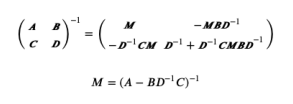

In [9]:
# 2.76
fig, ax = plt.subplots(figsize=(5, 5))
d = plt.imread('./graph/2.3.32.76.png')
plt.axis('off')
ax.imshow(d)

用2.102的一阶项计算z的**均值**。先找到一阶项：

$$ x^T\Lambda\mu - x^TA^TLb + y^TLb = \left( \begin{array}{c} x \\ y \end{array} \right)^T \left( \begin{array}{c} \Lambda\mu - A^TLb \\ Lb \end{array} \right) \tag{2.106} $$

跟2.71对比求出均值表达式。

$$ \mathbb{E}[z] = R^{-1} \left( \begin{array}{c} \Lambda\mu - A^TLb \\ Lb \end{array} \right) \tag{2.107} $$
用2.106带入计算结果

$$ \mathbb{E}[z] = \left( \begin{array}{c} \mu \\ A\mu + b \end{array} \right) \tag{2.108} $$


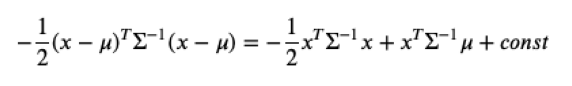

In [18]:
# 2.71
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.3.32.71.png')
plt.axis('off')
ax.imshow(d)

计算边缘分布y的表达式.直接利用2.92和2.93就可得到结果：

$$ \begin{eqnarray} \mathbb{E}[y] &=& A\mu + b \tag{2.109} \\ cov[y] &=& L^{-1} + A\Lambda^{-1}A^T \tag{2.110} \end{eqnarray} $$

当A=I，**均值就是两个之和（是均值为$\mu和b$的两个高斯分布之和），方差也是两个之和。**

最后，求$ p(x|y) $。用2.73和2.75来对比2.105和2.108.得到方差和均值：
$$
\begin{aligned}
\mathbb{E}[\boldsymbol{x} \mid \boldsymbol{y}]=&\left(\boldsymbol{\Lambda}+\boldsymbol{A}^{T} \boldsymbol{L} \boldsymbol{A}\right)^{-1}\left\{\boldsymbol{A}^{T} \boldsymbol{L}(\boldsymbol{y}-\boldsymbol{b})+\boldsymbol{\Lambda} \boldsymbol{\mu}\right\} \\
& \operatorname{cov}[\boldsymbol{x} \mid \boldsymbol{y}]=\left(\boldsymbol{\Lambda}+\boldsymbol{A}^{T} \boldsymbol{L} \boldsymbol{A}\right)^{-1}
\end{aligned} \tag{2.111,2.112}
$$


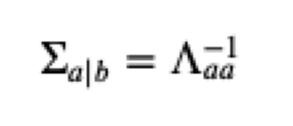

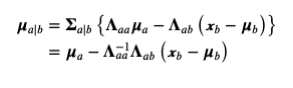

In [8]:
# 2.73 2.75
fig, ax = plt.subplots(figsize=(5, 5))
d = plt.imread('./graph/2.3.32.73.png')
plt.axis('off')
ax.imshow(d)
fig, ax = plt.subplots(figsize=(5, 5))
d = plt.imread('./graph/2.3.32.75.png')
plt.axis('off')
ax.imshow(d)


总结：



对于$ x $的边缘高斯分布和$ y $关于$ x $的条件高斯分布：

$$ p(x) = \mathcal{N}(x|\mu,\Lambda^{-1}) \tag{2.113} $$

$$ p(y|x) = \mathcal{N}(y|Ax + b,L^{-1}) \tag{2.114} $$

那么$ y $的边缘分布和$ x $关于$ y $的条件高斯分布为：

$$ p(y) = \mathcal{N}(y|A\mu + b,L^{-1} + A\Lambda^{-1}A^T) \tag{2.115} $$

$$ p(x|y) = \mathcal{N}(x|\Sigma\left\{A^TL(y-b) + \Lambda\mu \right\},\Sigma) \tag{2.116} $$

其中

$$ \Sigma = (\Lambda + A^TLA)^{-1} \tag{2.117} $$

## 2.3.4 高斯分布的最大似然估计
准备：给定一个数据集$ X = (x_1,...,x_N)^T $，i.i.d.最大似然来估计参数，对数似然为：

$$ \ln p(X|\mu, \Sigma) = -\frac{ND}{2}\ln(2\pi)-\frac{N}{2}\ln |\Sigma| - \frac{1}{2}\sum\limits_{n=1}^{N}(x_n - \mu)^T\Sigma^{-1}(x_n - \mu) \tag{2.118} $$



整理一下，最大似然只依赖于数据集的两个量，叫充分统计量：

$$ \sum\limits_{n=1}^Nx_n , \sum\limits_{n=1}^Nx_nx_n^T \tag{2.119} $$

对$\mu$求导（C.19）:
$$ \frac{\partial}{\partial\mu}\ln p(X|\mu,\Sigma) = \sum\limits_{n=1}^N\Sigma^{-1}(x_n - \mu) \tag{2.120} $$

导数为0得到均值的最大似然估计：

$$ \mu_{ML} = \frac{1}{N}\sum\limits_{n=1}^Nx_n \tag{2.121} $$

我们还可以计算得到方差。

$$ \Sigma_{ML} = \frac{1}{N}\sum\limits_{n=1}^N(x_n - \mu_{ML})(x_n - \mu_{ML})^T \tag{2.122} $$

如果我们估计真实概率分布，可以得到有偏的结果。协方差期望小于真实值。
$$ \begin{eqnarray} \mathbb{E}[\mu_{ML}] &=& \mu \tag{2.123} \\ \mathbb{E}[\Sigma_{ML}] &=& \frac{N - 1}{N}\Sigma \tag{2.124} \end{eqnarray} $$

所以需要补正。
$$ \widetilde{\Sigma} = \frac{1}{N-1}\sum\limits_{n=1}^N(x_n - \mu_{ML})(x_n - \mu_{ML})^T \tag{2.125} $$



## 2.3.5 顺序估计
处理一个数据，整合进模型，处理完就丢掉。
最大似然估计：

$$ \mu_{ML} = \frac{1}{N}\sum\limits_{n=1}^Nx_n \tag{2.121} $$
把第$ N $个观察量的估计记作$\mu_{ML}^{(N)}$，就可以写成：

$$ \begin{eqnarray} \mu_{ML}^{(N)} &=& \frac{1}{N}\sum\limits_{n=1}^Nx_n \ &=& \frac{1}{N}x_N + \frac{1}{N}\sum\limits_{n=1}^{N-1}x_n \ &=& \frac{1}{N}x_N + \frac{N-1}{N}\mu_{ML}^{(N-1)} \ &=& \mu_{ML}^{(N-1)} + \frac{1}{N}(x_N - \mu_{ML}^{(N-1)}) \tag{2.126} \end{eqnarray} $$

只要增加一个新观测数据的修正量，就可以得到结果了。**随着N增加，修正量的影响也在变小**

推广到通用层面：Robbins-Monro算法。

考虑一对有联合分布$ p(z, \theta) $控制的随机变量$ \theta , z $。$ \theta $上的$ z $的条件期望由确定函数$ f(\theta) $给出：

$$ f(\theta) \equiv \mathbb{E}[z|\theta] = \int zp(z|\theta) dz \tag{2.127} $$

称之为回归函数。我们假定的目标是找到$ f(\theta^*) = 0 $的根$ \theta^* $。

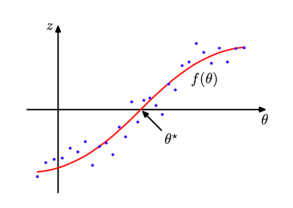

In [7]:
# 2.10
fig, ax = plt.subplots(figsize=(5, 5))
d = plt.imread('./graph/2.3.52.10.png')
plt.axis('off')
ax.imshow(d)

如果有大量数据$ z, \theta $，我们可以直接建模，然后估计根的值。但我们一次只有一个z的观测值，我们需要用顺序估计求根$ \theta^* $。也就是Robbins-Monro算法。

首先假定z的条件方差是有限的：

$$ \mathbb{E}[(z-f)^2|\theta] < \infty \tag{2.128} $$
假设：
当$ \theta > \theta^∗ $时$ f(\theta) > 0 $,
当$ \theta < \theta^∗ $时$ f(\theta) < 0 $,跟2.10画的一样。

那么根的顺序估计就是：

$$ \theta^{(N)} = \theta^{(N-1)} + a_{N-1}z(\theta^{(N-1)}) \tag{2.129} $$

其中$ z(\theta^{(N)}) $是当$ \theta $取$ \theta^{(N)} $时$ z $的观测值。系数$ {a_N} $表示一个满足下列条件的正数序列：

$$ \begin{eqnarray} \lim\limits_{N \to \infty}a_N &=& 0 \tag{2.130} \\ \sum\limits_{N=1}^\infty a_N &=& \infty \tag{2.131} \\ \sum\limits_{N=1}^\infty a_N^2 &<& \infty \tag{2.132} \end{eqnarray} $$

2.129以概率1收敛于根。2.130保证修正越来越小，2.131保证不会收敛到不根的值（阻止太快收束），2.132保证累计噪声是有限的（抑制noise发散），会收敛。

虽然我们只讨论了一元变量的情形，同样的技术，以及式（2.130）-（2.132）给出的关于系数$ a_N $的限制，同样适用于多元变量的情形。

## 2.3.6 高斯分布的贝叶斯推断
我们通过最大似然，可以求均值和方差了，现在通过贝叶斯方法引入他们的先验。

首先看个一元高斯分布，**方差是已知的** 。我们希望通过N次观测，推断出均值$\mu$。似然：
$$
p(\mathbf{x} \mid \mu)=\prod_{n=1}^{N} p\left(x_{n} \mid \mu\right)=\frac{1}{\left(2 \pi \sigma^{2}\right)^{\frac{N}{2}}} \exp \left\{-\frac{1}{2 \sigma^{2}} \sum_{n=1}^{N}\left(x_{n}-\mu\right)^{2}\right\}
\tag{2.137} $$
看作$\mu$的函数，似然没归一化（不是概率密度）。

似然是一个$\mu$的二次型，那我们把先验$p(\mu)$也选择高斯分布，它就是似然的共轭分布，从而后验就是两个$\mu$的二次型的乘积，也是高斯。令先验:
$$ p(\mu) = \mathcal{N}(\mu|\mu_0, \sigma_0^2) \tag{2.138} $$

且后验分布由：

$ p(\mu|X) \propto p(X|\mu)p(\mu) \tag{2.139} $

给出。 通过简单的配出指数中二次项的操作，可以得到的后验分布为：

$$ p(\mu|X) = \mathcal{N}(\mu|\mu_N, \sigma_N^2) \tag{2.140} $$

其中

$$ \begin{eqnarray} \mu_N &=& \frac{\sigma^2}{N\sigma_0^2+\sigma^2}\mu_0 + \frac{N\sigma_0^2}{N\sigma_0^2+\sigma^2}\mu_{ML} \tag{2.141} \\ \frac{1}{\sigma_N^2} &=& \frac{1}{\sigma_0^2} + \frac{N}{\sigma^2} \tag{2.142} \end{eqnarray} $$

其中$ \mu_{ML} $是$ \mu $的最大似然解，由样本均值给出：

$$ \mu_{ML} = \frac{1}{N}\sum\limits_{n=1}^Nx_n \tag{2.143} $$


观察有几个结论：
- 2.141:后验的均值是先验$\mu_0$和似然$\mu_{ML}$的折中。(2.20推导的时候也有这一点)
如果N=0，就变成先验；N趋近无穷大，变成似然。
- 2.142:精度是可以叠加的。每个观测精度之和+先验精度就是后验精度。
N趋近于无穷大，后验精度趋近于零,在最大似然附近变成尖峰。
- 对于有限的N，如果$\sigma_0\to \infty$，先验的方差无穷大，2.141后验均值就是最大似然，2.142方差变为$ \sigma_N^2 = \sigma^2 / N $。

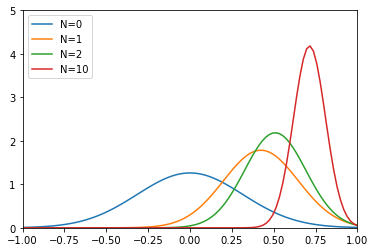

In [22]:
# 2.12
mu = Gaussian(0, 0.1)
model = Gaussian(mu, 0.1)

x = np.linspace(-1, 1, 100)
plt.plot(x, model.mu.pdf(x), label="N=0")

model.fit(np.random.normal(loc=0.8, scale=0.1, size=1))
plt.plot(x, model.mu.pdf(x), label="N=1")

model.fit(np.random.normal(loc=0.8, scale=0.1, size=1))
plt.plot(x, model.mu.pdf(x), label="N=2")

model.fit(np.random.normal(loc=0.8, scale=0.1, size=8))
plt.plot(x, model.mu.pdf(x), label="N=10")

plt.xlim(-1, 1)
plt.ylim(0, 5)
plt.legend()
plt.show()

上节顺序估计讲了最大似然问题可以转化为顺序更新问题：**N个数据点的均值：N-1个数据点的均值和一个数据点$x_N$的贡献。**

这里我们看后验分布可以写成：

$$ p(\mu|D) \propto \left[p(\mu)\prod\limits_{n=1}^{N-1}p(x_n|\mu)\right]p(x_N|\mu) \tag{2.144} $$

方括号里的是**观测N-1个数据点后的后验分布(忽略归一化系数)** 可以被看作一个 **先验分布**。 

**假设均值是已知的，推断方差。** 同样选择先验是共轭的。定义精度$ \lambda \equiv 1 / \sigma^2 $进行计算是最方便的。关于$ \lambda $的似然函数为：
$$
p(\mathbf{x} \mid \lambda)=\prod_{n=1}^{N} \mathcal{N}\left(x_{n} \mid \mu, \lambda^{-1}\right) \propto \lambda^{\frac{N}{2}} \exp \left\{-\frac{\lambda}{2} \sum_{n=1}^{N}\left(x_{n}-\mu\right)^{2}\right\}
\tag{2.145} $$

因此，对应的共轭先验正比于$ \lambda $的幂次数和$ \lambda $的线性函数的指数。这就是Gamma分布，定义为:

$ Gam(\lambda|a,b) = \frac{1}{\Gamma(a)}b^a\lambda^{a-1}exp(-b\lambda) \tag{2.146} $
其中 $$ \Gamma(x) \equiv \int_0^\infty u^{x-1}e^{-u}du $$ 是归一化系数。如果$ a > 0 $那么gamma分布积分是有穷的，如果$ a \leq 1 $，那么分布本身是有穷的(暂时不会证明)。图2.13展示了不同的$ a,b $的情况下分布。

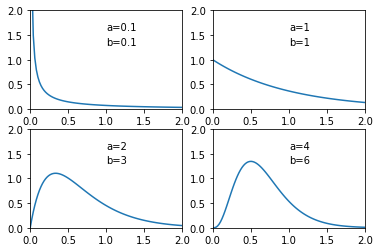

In [3]:
# 2.13
x = np.linspace(0, 2, 100)
for i, [a, b] in enumerate([[0.1, 0.1], [1, 1], [2, 3], [4, 6]]):
    plt.subplot(2, 2, i + 1)
    gamma = Gamma(a, b)
    plt.xlim(0, 2)
    plt.ylim(0, 2)
    plt.plot(x, gamma.pdf(x))
    plt.annotate("a={}".format(a), (1, 1.6))
    plt.annotate("b={}".format(b), (1, 1.3))
plt.show()

Gamma分布的均值和方差为：

$$ \begin{eqnarray} \mathbb{E}[\lambda] &=& \frac{a}{b} \tag{2.147} \\ var[\lambda] &=& \frac{a}{b^2} \tag{2.148} \end{eqnarray} $$



然后假设先验为$ Gam(\lambda|a_0,b_0) $如果乘以似然函数（2.145），那么就得到后验分布：
$$
p(\lambda \mid \mathbf{x}) \propto \lambda^{a_{0}-1} \lambda^{\frac{N}{2}} \exp \left\{-b_{0} \lambda-\frac{\lambda}{2} \sum_{n=1}^{N}\left(x_{n}-\mu\right)^{2}\right\}
 \tag{2.149} $$
整理一下，看成$Gam(\lambda|a_N, b_N) $的gamma分布，其中：

$$ \begin{eqnarray} a_N &=& a_0 + \frac{N}{2} \tag{2.150} \\ b_N &=& b_0 + \frac{1}{2}\sum\limits_{n=1}^N(x_n - \mu)^2 = b_0 + \frac{N}{2}\sigma_{ML}^2 \tag{2.151} \end{eqnarray} $$

其中$ \sigma_{ML}^2 $是对方差的最大似然估计。


观察有几个结论：
- 2.150:$ N $个数据点的效果是使$ a $增加了$ N / 2 $。因此我们可以把先验分布中的参数$ a_0 $看成$ 2a_0 $个“有效”先验观测。
- 2.151:$ N $个数据点为参数$ b $贡献了$ N\sigma_{ML}^2 / 2 $其中$ \sigma_{ML}^2 $是方差，所以把先验中的参数$b_0$解释为:$ 2a_0 $个方差为$ 2b_0/(2a_0) = b_0/a_0 $“有效”的先验观测的效果。


在使用方差本身而不是精度的情况下，共轭先验被称为逆Gamma（inverse gamma）分布。我们不会详细地讨论这个分布，因为使用精度来进行计算会更加方便。

现在，假设均值和精度都是未知的。为了找到共轭先验，考虑似然函数对$ \mu, \lambda $的依赖：
$$
\begin{array}{c}
p(\mathbf{x} \mid \mu, \lambda)=\prod_{n=1}^{N}\left(\frac{\lambda}{2 \pi}\right)^{\frac{1}{2}} \exp \left\{-\frac{\lambda}{2}\left(x_{n}-\mu\right)^{2}\right\} \\
\propto\left[\lambda^{\frac{1}{2}} \exp \left(-\frac{\lambda \mu^{2}}{2}\right)\right]^{N} \exp \left\{\lambda \mu \sum_{n=1}^{N} x_{n}-\frac{\lambda}{2} \sum_{n=1}^{N} x_{n}^{2}\right\}
\end{array} \tag{2.152}
$$

现在，我们在想找到一个对于$ \mu, \lambda $的依赖与似然函数有着相同的函数形式的先验分布$p(\mu,\lambda) $因此，假设形式：
$$
\begin{array}{c}
p(\mu, \lambda) \propto\left[\lambda^{\frac{1}{2}} \exp \left(-\frac{\lambda \mu^{2}}{2}\right)\right]^{\beta} \exp \{c \lambda \mu-d \lambda\} \\
=\exp \left\{-\frac{\beta \lambda}{2}\left(\mu-\frac{c}{\beta}\right)^{2}\right\} \lambda^{\frac{\beta}{2}} \exp \left\{-\left(d-\frac{c^{2}}{2 \beta}\right) \lambda\right\}
\end{array} \tag{2.153}
$$

其中$ c, d, \beta $是常量。由于总有$ p(\mu,\lambda) = p(\mu|\lambda)p(\lambda) $，我们可以通过观察找到$ p(\mu|\lambda), p(\lambda) $。特别的，$ p(\mu|\lambda) $是一个精度为关于$ \lambda $的线性函数的高斯分布，$p(\lambda) $是一个gamma分布时，得到的标准化的先验形式为：

$$ p(\mu,\lambda) = \mathcal{N}(\mu|\mu_0,(\beta\lambda)^{-1})Gam(\lambda|a,b) \tag{2.154} $$

其中，我们的新常数为$ \mu_0 = c/\beta, a = 1 + \beta / 2, b = d - c^2/2\beta $（对比就可以得到）。式（2.154）的分布被称为正态-gamma（normal-gamma）或高斯-gamma（Gaussian-gamma）分布，并在图2.14中展示。


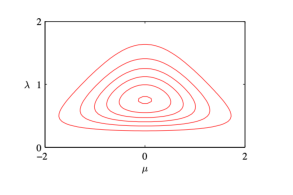

In [6]:
# 2.14 mu_0=0,beta=2,a=5,b=6
fig, ax = plt.subplots(figsize=(5, 5))
d = plt.imread('./graph/2.3.62.14.png')
plt.axis('off')
ax.imshow(d)

注意，这不是两个独立的高斯和gamma分布的乘积。因为$ \mu $的精度是$ \lambda $的线性函数。会互相影响。

## 2.3.7 学生t分布
我们已经证明高斯分布的精度的共轭先验是gamma分布。如果把一元高斯$ \mathcal{N}(x|\mu,\tau) $和Gamma先验$ Gam(\tau|a,b) $结合一起并积分掉精度，得到$ x $的边缘分布形式：
$$
\begin{aligned}
p(x \mid \mu, a, b) &=\int_{0}^{\infty} \mathcal{N}\left(x \mid \mu, \tau^{-1}\right) \operatorname{Gam}(\tau \mid a, b) \mathrm{d} \tau \\
&=\int_{0}^{\infty} \frac{b^{a} e^{(-b \tau)} \tau^{a-1}}{\Gamma(a)}\left(\frac{\tau}{2 \pi}\right)^{\frac{1}{2}} \exp \left\{-\frac{\tau}{2}(x-\mu)^{2}\right\} \mathrm{d} \tau \\
&=\frac{b^{a}}{\Gamma(a)}\left(\frac{1}{2 \pi}\right)^{\frac{1}{2}}\left[b+\frac{(x-\mu)^{2}}{2}\right]^{-a-\frac{1}{2}} \Gamma\left(a+\frac{1}{2}\right)
\end{aligned} \tag{2.158}
$$

其中我们使用了变量替换$ z = \tau[b+(x-\mu)^2/2] $。

为了方便，我们定义了新变量$ v = 2a, \lambda = a/b $那么分布$ p(x|\mu,a,b) $就可以写成：

$$ St(x|\mu,\lambda,v) = \frac{\Gamma(v/2+1/2)}{\Gamma(v/2)}\left(\frac{\lambda}{\pi v}\right)^{1/2}\left[1+\frac{\lambda(x-\mu)^2}{v}\right]^{-v/2-1/2} \tag{2.159} $$

这就是学生t分布。参数$ \lambda $有时被称为t分布的精度，虽然它并不总是等于方差的逆。参数$ v $表示自由度，图2.15展示了它的影响。

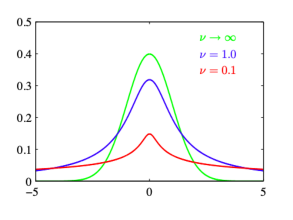

In [5]:
# 2.15
fig, ax = plt.subplots(figsize=(5, 5))
d = plt.imread('./graph/2.3.72.15.png')
plt.axis('off')
ax.imshow(d)

- v=1，t分布退化成柯西分布；
- $ v \to \infty $,t分布变成高斯分布$ \mathcal{N}(x|\mu,\lambda^{-1}) $

2.158学生t分布是由无穷多个相同均值不同精度高斯分布相加而成的。(Gamma分布积分后的部分是归一化系数)，高斯混合。结果是一个通常有着比高斯分布更长的“尾巴”的概率分布，正如图2.15展示的。

这给出了t分布的一个叫做鲁棒性（robustness）的重要性质，这表示对于数据集里存在几个离群点（outlier），t分布不会像高斯分布那样敏感。图2.16展示了t分布的鲁棒性，并对比了高斯分布和t分布的最大似然解

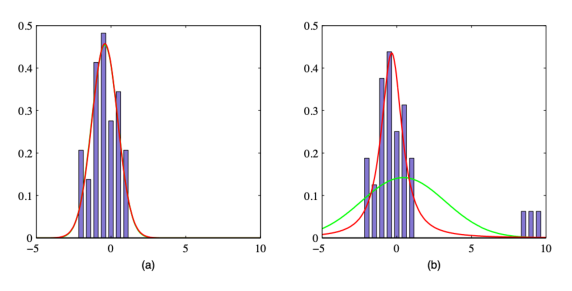

In [11]:
# 2.16
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.3.72.16.png')
plt.axis('off')
ax.imshow(d)

t分布的最大似然可以用EM算法求解。如果数据有误标记或者本身就是长尾概率的时候，就会派上用场（比一般的高斯分布好）。

如果我们回到式（2.158）并代入参数$ v = 2a, \lambda = a/b, \eta = \tau b/a $，得到t分布可以写成：

$$ St(x|\mu,\lambda,v) = \int\limits_0^\infty\mathcal{N}(x|\mu,(\eta\lambda)^{-1})Gam(\eta|v/2,v/2)d\eta \tag{2.160} $$



可以把它推广到多元高斯$ \mathcal{N}(x|\mu,\Lambda) $来得到对应的多元t分布：

$$ St(x|\mu,\Lambda,v) = \int\limits_0^\infty\mathcal{N}(x|\mu,(\eta\Lambda)^{-1})Gam(\eta|v/2,v/2)d\eta \tag{2.161} $$

使用与一元变量相同的方法，求解这个积分，得：

$$ St(x|\mu,\Lambda,v) = \frac{\Gamma(D/2+v/2)}{\Gamma(v/2)}\frac{|\Lambda|^{1/2}}{(\pi v)^{D/2}}\left[1+\frac{\Delta^2}{v}\right]^{-D/2-v/2} \tag{2.162} $$

其中$ D $是向量$ x $的维数，$ \Delta^2 $是由

$$ \Delta^2 = (x-\mu)^T\Lambda(x-\mu) \tag{2.163} $$

定义的马氏距离（Mahalanobis distance）的平方。

这个形式的多元t分布满足下面这些性质：

$$ \begin{eqnarray} \mathbb{E}[x] &=& \mu, & \text{if } v > 1 \tag{2.164} \\ cov[x] &=& \frac{v}{(v-2)}\Lambda^{-1}, & \text{if } v > 2 \tag{2.165} \\ mode[x] &=& \mu \tag{2.166} \end{eqnarray} $$

对应地，可以得到一元变量的结果

## 2.3.8 周期变量
实际生活中有周期变量。比如风向，或者日历，按照年，天，小时等周期循环。用极坐标建模$ 0 \leq θ < 2\pi $就很方便。

我们可能选取一个方向作为原点，然后应用传统的概率分布（例如高斯分布）来处理。但是，**这种方法得出的结果会强烈依赖于原点的选择。** 例如，假设我们有两个观测，分别位是$ \theta_1 = 1^{\circ}, \theta_2 = 359^{\circ} $，然后我们使用标准一元高斯分布建模。
- 如果把原点选择在$ 0^{\circ} $，那么这个数据集的样本均值为$ 180^{\circ} $，标准差在$ 179^{\circ} $。
- 如果把原点选择在$ 180^{\circ} $，那么均值为$ 0^{\circ} $，标准差为$ 1^{\circ} $。 

(不好的原因：均值方差大小依赖原点的选择)

让我们考虑估计周期观测集合$ D = {\theta_1,...\theta_N} $的**均值**的问题。从现在开始，我们用$ \theta $表示弧度。我们已经看到，简单的平均值$ (\theta_1+...+\theta_N)/N $非常依赖于坐标系的选择。为了给均值找到一个不变的度量，我们发现观测可以被看做**单位圆上的点**。因此，可以用二维单位**向量来**$ x_1,...x_N $其中$ \Vert{x_n}\Vert = 1, n = 1,...,N $来描述，如图2.17所示。

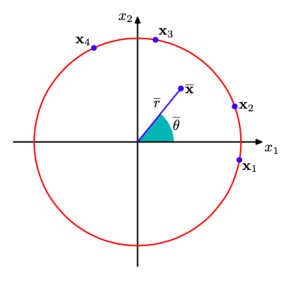

In [14]:
# 2.17
fig, ax = plt.subplots(figsize=(5, 5))
d = plt.imread('./graph/2.3.82.17.png')
plt.axis('off')
ax.imshow(d)

求向量的平均可以得到，
$$ \bar{x} = \frac{1}{N}\sum\limits_{n=1}^Nx_n \tag{2.167} $$
然后求出这个平均值对应的弧度$ \bar{\theta} $。显然，这个定义保证均值的位置与极坐标原点选择无关。注意$ \bar{x} $通常在单位圆的内部。这些观测值在笛卡尔坐标系中表示为$ x_n = (\cos \theta_n, \sin \theta_n) $，样本均值在笛卡尔坐标系中表示为$ \bar{x} = (\bar{r}\cos \bar{\theta},\bar{r}\sin \bar{\theta}) $。代入(2.167)并同等看待$ x_1, x_2 $得到：

$$ \bar{r}\cos \bar{\theta} = \frac{1}{N}\sum\limits_{n=1}^N\cos \theta_n , \bar{r}\sin \bar{\theta} = \frac{1}{N}\sum\limits_{n=1}^N\sin \theta_n \tag{2.168} $$

求两者的比值，使用等式$ tan\theta = \sin \theta / \cos \theta $，得到$\bar{\theta} $：

$$
\bar{\theta}=\tan ^{-1}\left\{\frac{\sum_{n} \sin \theta_{n}}{\sum_{n} \cos \theta_{n}}\right\}
\tag{2.169} $$


现在我们将高斯分布推广到周期化：von Mises分布。看一元分布。

按照惯例，考虑的周期概率分布$ p(\theta) $的周期为$ 2\pi $。任何一个定义在$ \theta $上的概率密度$ p(\theta) $不仅仅非负和积分等于1，而且有周期性的。因此，$ p(\theta) $一定满足下面三个条件：

$$ \begin{eqnarray} p(\theta) &\geq& 0 \tag{2.170} \\ \int_0^{2\pi}p(\theta)d\theta &=& 1 \tag{2.171} \\ p(\theta + 2\pi) &=& p(\theta) \tag{2.172} \end{eqnarray} $$

根据式（2.172）衍生，得到对于任意整数$ M $都有$ p(\theta + M2\pi) = p(\theta) $。

可以很容易得到满足这三个条件的类高斯分布：

假设两个变量$ x = (x_1, x_2) $的具有均值$ \mu = (\mu_1, \mu_2) $和协方差矩阵为$ \Sigma = \sigma^2I $的高斯分布（其中I是$ 2 \times 2 $的单位矩阵），所以：
$$
p\left(x_{1}, x_{2}\right)=\frac{1}{2 \pi \sigma^{2}} \exp \left\{-\frac{\left(x_{1}-\mu_{1}\right)^{2}+\left(x_{2}-\mu_{2}\right)^{2}}{2 \sigma^{2}}\right\}
\tag{2.173} $$

$ p(x) $的等高线是圆，如图2.18中展示。



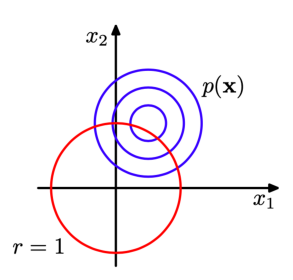

In [3]:
# 2.18
fig, ax = plt.subplots(figsize=(5, 5))
d = plt.imread('./graph/2.3.82.18.png')
plt.axis('off')
ax.imshow(d)

现在，考虑这个沿着一个固定半径的圆的分布的值，然后就能构造出没有被标准化周期分布。可以通过从笛卡尔坐标$(x_1, x_2) $转化为极坐标$(r, \theta) $的方式确定这个分布的形式，即：

$$ x_1 = r\cos \theta, x_2 = r\sin \theta \tag{2.174} $$

同时，把$ \mu $映射到极坐标中：

$$ \mu_1 = r_0\cos \theta_0 , \mu_2 = r_0\sin \theta_0 \tag{2.175} $$

接下来，把这些变换代入二维高斯分布（2.173）中，并限制在单位圆$ r = 1 $上，注意，我们只对关于$ \theta $的相关性感兴趣。关注高斯分布的指数得到：

$$ \begin{eqnarray} &-&\frac{1}{2\sigma^2}\{(r\cos \theta - r_0\cos \theta_0)^2 + (r\sin \theta - r_0\sin \theta_0)^2\} \ & & = -\frac{1}{2\sigma^2}\{1+r_0^2-2r_0\cos \theta \cos \theta_0 - 2r_0\sin \theta \sin \theta_0\} \ & & = \frac{r_0}{\sigma^2}\cos (\theta - \theta_0) + const \tag{2.176} \end{eqnarray} $$

其中$ const $表示与$ \theta $无关的项，同时我们使用了下面的三角等式：

$$ \begin{eqnarray} \cos ^2A + \sin ^2 A &=& 1 \tag{2.177} \\ \cos A\cos B + \sin A\sin B &=& \cos (A-B) \tag{2.178} \end{eqnarray} $$


如果定义$ m = r_0/\sigma^2 $，得到单位圆$ r = 1 $上分布$ p(\theta) $的最终表达式：

$$ p(\theta|\theta_0,m) = \frac{1}{2\pi I_0(m)}exp\{m\cos (\theta-\theta_0)\} \tag{2.179} $$

这就是von Mises分布，或环形正态分布（circular normal）。这里的$ \theta_0 $对应分布的均值，$ m $被称为浓度（concentration）参数，类似于高斯分布的方差的逆(精度)。式（2.179）中的标准化参数由$ I_0(m) $项表达，这是第一类零阶Bessel函数，由

$$ I_0(m) = \frac{1}{2\pi}\int_0^2\pi exp\{m\cos \theta\} d\theta \tag{2.180} $$

定义。对于大的$ m $，这个分布接近于高斯分布。图2.19给出了von Mises分布的图像，图2.20给出了函数$ I_0(m) $的图像。

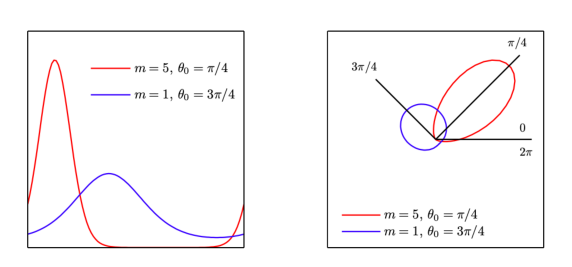

In [50]:
# 2.19
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.3.82.19.png')
plt.axis('off')
ax.imshow(d)

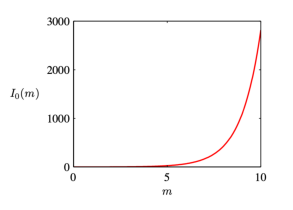

In [12]:
# 2.20left
fig, ax = plt.subplots(figsize=(5, 5))
d = plt.imread('./graph/2.3.82.20left.png')
plt.axis('off')
ax.imshow(d)

现在，考虑用最大似然来估计von Mises分布的参数$ \theta_0,m $。对数似然函数由：

$$ \ln p(D|\theta_0,m) = -N\ln(2\pi) - N\ln I_0(m) + m\sum\limits_{n=1}^N\cos (\theta_n - \theta_0) \tag{2.181} $$

令其关于$ \theta_0 $的导数等于零，得到

$$ \sum\limits_{n=1}^N\sin (\theta_n - \theta_0) = 0 \tag{2.182} $$

为了求得$ \theta_0 $，使用三角等式：

$$ \sin (A-B) = \sin A\cos B - \cos A\sin B \tag{2.183} $$

根据这些，得到
$$
\theta_{0}^{M L}=\tan ^{-1}\left\{\frac{\sum_{n} \sin \theta_{n}}{\sum_{n} \cos \theta_{n}}\right\}
\tag{2.184} $$

这是之前，把它看成二维笛卡尔空间的观测的均值的式（2.169）所得到的结果。

类似的，关于$ m $最大化（2.181），且使用$ I'_0(m) = I_1(m) $（Abramowitz and Stegun, 1965）得到：

$$ A(m) = \frac{1}{N}\sum\limits_{n=1}^N\cos (\theta_n-\theta_0^{ML}) \tag{2.185} $$

其中我们已经用最大似然解$ \theta_0^{ML} $替换了对应的变量（我们正在关于$ \theta, m $进行联合最优化），我们定义：

$$ A(m) = \frac{I_1(m)}{I_0(m)} \tag{2.186} $$

函数$ A(m) $由图2.20展示

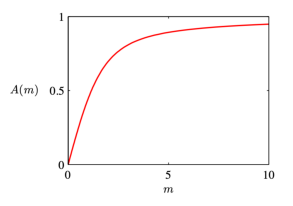

In [13]:
# 2.20right
fig, ax = plt.subplots(figsize=(5, 5))
d = plt.imread('./graph/2.3.82.20right.png')
plt.axis('off')
ax.imshow(d)

使用式（2.178）给出的三角等式，可以把（2.185）写成：

$$ A(m_{ML}) = \left(\frac{1}{N}\sum\limits_{n=1}^N\cos \theta_n\right)\cos \theta_0^{ML}-\left(\frac{1}{N}\sum\limits_{n=1}^N\sin \theta_n\right)\sin \theta_0^{ML} \tag{2.187} $$

式（2.187）的右手边很容易求得，且函数$ A(m) $可以数值求逆。

为了完整性，我们简要提一下其它构造周期概率分布的方法。
- 最简单的方法是划分极坐标为固定大小区间，再画出观测点的直方图。这种方法的优点是简单、灵活，但是也有极大的局限性。我们将在2.5节详细讨论直方图方法时看到这一点。
- 另一种方法与von Mises分布类似，都是从欧几里得空间的高斯分布开始，但是这个方法是在单位圆上求积分（边缘化），而不是把它当成概率的条件（Mardia and Jupp, 2000）。但是，这使得概率分布的形式更加复杂，因此我们不会更详细的讨论。
- 最后一种方法是，在实数轴上的任何有效的分布(例如高斯分布)都可以通过把间隔为$ 2\pi $连续区间映射为周期变量$(0, 2\pi) $，相当于把实数轴沿着单位圆进行包裹。与之前一样，得到的概率分布会比von Mises分布在计算上更加复杂。

von Mises分布的一个局限性是它是单峰的。但是，通过将多个von Mises分布混合，就可以得到能对多个峰值的周期变量进行建模的灵活框架。Lawrence et al. (2002)给出了一个使用von Mises分布的机器学习的应用例子。关于回归问题中条件密度建模的更多信息，可以参考

## 2.3.9 高斯混合模型

实际数据直接高斯建模有局限性。如图2.21忠实泉的问题。

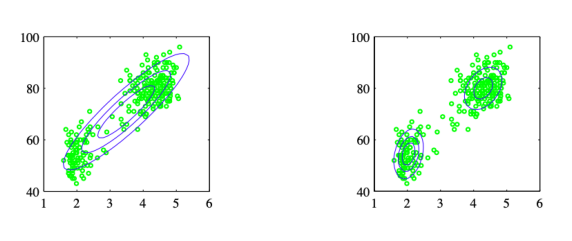

In [8]:
# 图2.21
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/图2.21.png')
plt.axis('off')
ax.imshow(d)

横轴持续喷发分钟，纵轴下次喷发间隔时间。单一高斯不好，多个高斯线性叠加更好。多个基本概率分布线性组合的方式叫混合分布。图2.22三合一。

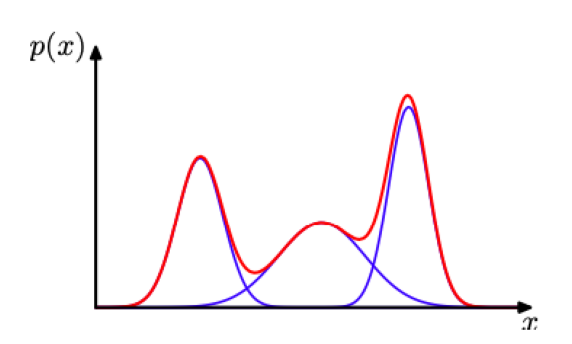

In [9]:
# 图2.22
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/图2.22.png')
plt.axis('off')
ax.imshow(d)

足够多的高斯组合可以拟合几乎任意连续概率密度函数。比方说k个：

$$ p(x) = \sum\limits_{k=1}^K \pi_k \mathcal{N}(x|\mu_k, \Sigma_k) \tag{2.188} $$

这被叫做混合高斯。如图 2.23。混合模型还有其他线性组合在9.3.3有伯努利分布的混合。

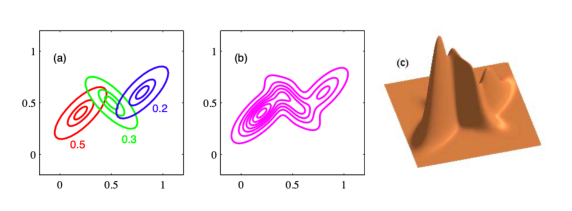

In [10]:
# 图2.23
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/图2.23.png')
plt.axis('off')
ax.imshow(d)

这里$ \pi_k $被称为混合系数。如果我们同时在两边对$x $进行积分，（注意$ p(x) $和单独的高斯组件都是标准化的），得到：

$$ \sum\limits_{k=1}^K \pi_k = 1 \tag{2.189} $$


且，$ p(x) \geq 0, \mathcal{N}(x|\mu_k, \Sigma_k) \geq 0 $这些条件隐含的对于任意$k $都有$ \pi_k \geq 0 $。结合条件（2.189）得到：

$$ 0 \leq \pi_k \leq 1 \tag{2.190} $$

因此，我们看到混合系数满足成为概率的要求。

根据加法和乘法规则，得到边缘密度为：

$$ p(x) = \sum\limits_{k=1}^Kp(k)p(x|k) \tag{2.191} $$

其中，把$ \pi_k = p(k) $看成使用第$ k $个组件的先验概率，把密度$ \mathcal{N}(x|\mu_k,\Sigma_k) = p(x|k) $看成以$ k $为条件的$x $的概率，这就等于式（2.188）。

后验概率$ p(k|x) $有时也被称为责任（responsibilities），起着很重要的作用。根据贝叶斯定理，后验概率为：

$$ \begin{eqnarray} \gamma_k(x) &\equiv& p(k|x) \ &=& \frac{p(k)p(x|k)}{\sum_lp(l)p(x|l)} \ &=& \frac{\pi_k\mathcal{N}(x|\mu_k, \Sigma_k)}{\sum_l\pi_l\mathcal{N}(x|\mu_l, \Sigma_l)} \tag{2.192} \end{eqnarray} $$

将在第9章比较详细地讨论混合分布的概率意义。（分量 k 对于“解释”观测值 x 的“责任”）

控制混合高斯分布的参数$ \pi,\mu,\Sigma $，被记为$ \pi \equiv {\pi_1,...,\pi_K}, \mu \equiv {\mu_1,...,\mu_K}, \Sigma \equiv {\Sigma_1,...,\Sigma_K} $。确定这些参数值的一种方法是使用最大似然。根据公式（2.188）得到对数似然函数：

$$
\ln p(\boldsymbol{X} \mid \boldsymbol{\pi}, \boldsymbol{\mu}, \boldsymbol{\Sigma})=\sum_{n=1}^{N} \ln \left\{\sum_{k=1}^{K} \pi_{k} \mathcal{N}\left(\boldsymbol{x}_{n} \mid \boldsymbol{\mu}_{k}, \boldsymbol{\Sigma}_{k}\right)\right\}
\tag{2.193} $$

其中 $ X = {x_1,...,x_N} $。因为对数中存在一个根据$k $的求和公式，这比一元高斯分布复杂得多。这导致参数的最大似然解不再是一个封闭形式的解析解。最大化这个似然函数的一种方法是使用迭代数值优化法（梯度下降，牛顿法之类的吧）。另一种方法是使用一种被称为期望最大化（Em算法）的强大的框架，将在第9章详细讨论。

MultivariateGaussianMixture(
    mu=[[ 5.19257195 -5.11521031]
 [-4.82787721 -4.92814811]
 [ 0.00528725  5.05469719]]
    cov=[[[ 0.93404868 -0.11885976]
  [-0.11885976  1.06184561]]

 [[ 0.98447249  0.05311369]
  [ 0.05311369  0.95596386]]

 [[ 1.05816756  0.08516649]
  [ 0.08516649  0.89050594]]]
    coef=[0.33333333 0.33333333 0.33333333]
)


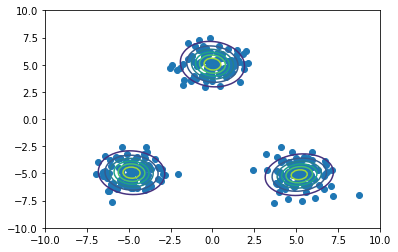

In [3]:
# 例子
x1 = np.random.normal(size=(100, 2))
x1 += np.array([-5, -5])
x2 = np.random.normal(size=(100, 2))
x2 += np.array([5, -5])
x3 = np.random.normal(size=(100, 2))
x3 += np.array([0, 5])
X = np.vstack((x1, x2, x3))

model = MultivariateGaussianMixture(n_components=3)
model.fit(X)
print(model)

x_test, y_test = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
X_test = np.array([x_test, y_test]).reshape(2, -1).transpose()
probs = model.pdf(X_test)
Probs = probs.reshape(100, 100)
plt.scatter(X[:, 0], X[:, 1])
plt.contour(x_test, y_test, Probs)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

## 2.4 指数族分布

到目前学到的各种概率分布（除了高斯混合）都是指数族分布下的特殊例子，有共同性质。比如：

给定参数$\eta $的$ x $上的指数族分布是具有

$$ p(x|\eta) = h(x)g(\eta)exp\{\eta^Tu(x)\} \tag{2.194} $$

形式的概率分布的集合。其中$ x $可以是标量也可以是向量，可以是连续的也可以是离散的。$ \eta $是分布的自然参数（natural parameters），$ u(x) $是关于$ x $的某个函数。函数$ g(\eta) $可以解释为是为了保证分布标准化的系数，且满足：
$$ g(\eta)\int h(x)exp\{\eta^Tu(x)\}dx = 1 \tag{2.195} $$

其中，对于离散变量积分就变成求和。

首先，给出一些本章之前讨论的一些分布，然后证明这些分布确实是指数族分布。首先考虑伯努利分布：

$$ p(x|\mu) = Bern(x|\mu) = \mu^x(1-\mu)^{1-x} \tag{2.196} $$

把右侧表示成对数的指数形式，得到：(合并x项)

$$
\begin{aligned}
p(x \mid \mu) &=\exp \{x \ln \mu+(1-x) \ln (1-\mu)\} \\
&=(1-\mu) \exp \left\{\ln \left(\frac{\mu}{1-\mu}\right) x\right\}
\end{aligned}
 \tag{2.197}$$

与公式（2.194）对照，得到：

$$ \eta = \ln\left(\frac{\mu}{1-\mu}\right) \tag{2.198} $$

然后就可以解出$ \mu = \sigma (\eta) $(反过来表示)，其中

$$ \sigma (\eta) = \frac{1}{1+exp(-\eta)} \tag{2.199} $$

这就是logistic sigmoid函数。因此可以把伯努利分布写成式（2.194）的标准形式：（上下同乘exp(x)）

$$ p(x|\eta) = \sigma(-\eta)exp(\eta x) \tag{2.200} $$

其中使用了可以从式（2.199）中很容易证明的$ 1 - \sigma(\eta) = \sigma(-\eta) $，对比公式（2.194）得到：

$$ \begin{eqnarray} u(x) &=& x \tag{2.201} \\ h(x) &=& 1 \tag{2.202} \\ g(\eta) &=& \sigma(-\eta) \tag{2.203} \end{eqnarray} $$



接下来，考虑单观测值$ x $的多项式分布：
$$
p(\boldsymbol{x} \mid \boldsymbol{\mu})=\prod_{k=1}^{M} \mu_{k}^{x_{k}}=\exp \left\{\sum_{k=1}^{M} x_{k} \ln \mu_{k}\right\}
\tag{2.204} $$

其中$ x = (x_1,...,x_N)^T $。同样的，可以写成式（2.194）的标准形式：

$$ p(x|\eta) = exp(\eta^Tx) \tag{2.205} $$

其中$ \eta_k = \ln \mu_k $，且定义了$ \eta = (\eta_1,...,\eta_M)^T $。同样，对比式（2.194）得到：

$$ \begin{eqnarray} u(x) = x \tag{2.206} \\ h(x) = 1 \tag{2.207} \\ g(\eta) = 1 \tag{2.208} \end{eqnarray} $$

注意，因为参数$ \mu_k $要满足(一个事件有k个状态，表示对应状态出现的概率)

$$ \sum\limits_{k=1}^M\mu_k = 1 \tag{2.209} $$

，所以给定任意$ M − 1 $个参数$\mu_k $剩下的参数就固定了，因此参数$\eta_k $不是相互独立的。在某些情况下，去掉这个限制，只用$ M − 1 $个参数来表示分布会比较方便。可以使用式（2.209）中的关系，用$ {\mu_k}，k=1,...,M-1 $来表示最后的$ \mu_M $，这样就只剩下$ M - 1 $个参数了。注意，剩余的参数仍然要满足：

$$ 0 \leq \mu_k \leq 1, \sum\limits_{k=1}^{M-1}\mu_k \leq 1 \tag{2.210} $$

使用式（2.209）的约束，这种表达方式下多项式分布变成：

$$
\begin{aligned}
\exp &\left\{\sum_{k=1}^{M} x_{k} \ln \mu_{k}\right\} \\
&=\exp \left\{\sum_{k=1}^{M-1} x_{k} \ln \mu_{k}+\left(1-\sum_{k=1}^{M-1} x_{k}\right) \ln \left(1-\sum_{k=1}^{M-1} \mu_{k}\right)\right\} \\
&=\exp \left\{\sum_{k=1}^{M-1} x_{k} \ln \left(\frac{\mu_{k}}{1-\sum_{j=1}^{M-1}\mu_j}\right)+\ln \left(1-\sum_{k=1}^{M-1} \mu_{k}\right)\right\}
\end{aligned}
\tag{2.211} $$

现在，确定

$$ \ln\left(\frac{\mu_k}{1-\sum_j\mu_j}\right)=\eta_k \tag{2.212} $$

首先两边对$ k $求和，然后重新整理，回带，就可以解出$ \mu_k $：

$$ \mu_k = \frac{exp(\eta_k)}{1+\sum_jexp(\eta_j)} \tag{2.213} $$

这被称为softmax函数，或标准化指数（normalized exponential）。

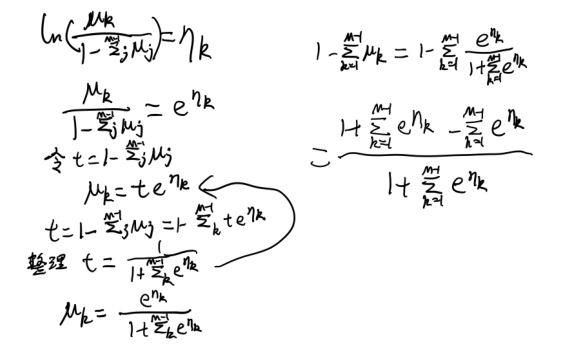

In [11]:
# 推导
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.4推导.png')
plt.axis('off')
ax.imshow(d)

在这种表达方式下，多项式分布具有：

$$ p(x|\eta) = \left(1 + \sum\limits_{k=1}^{M-1}exp(\eta_k)\right)^{-1} exp(\eta^Tx) \tag{2.214} $$

这是具有参数向量$ \eta = (\eta_1,...,\eta_{M-1})^T $的指数族的标准形式。其中：

$$ \begin{eqnarray} u(x) &=& x \tag{2.215} \\ h(x) &=& 1 \tag{2.216} \\ g(\eta) &=& \left(1+\sum\limits_{k=1}^{M-1}exp(\eta_k)\right)^{-1} \tag{2.217} \end{eqnarray} $$

最后，考察高斯分布。对于一元高斯有：
$$
\begin{array}{l}
p\left(x \mid \mu, \sigma^{2}\right)=\frac{1}{\left(2 \pi \sigma^{2}\right)^{\frac{1}{2}}} \exp \left\{-\frac{1}{2 \sigma^{2}}(x-\mu)^{2}\right\} \\ 
=\frac{1}{\left(2 \pi \sigma^{2}\right)^{\frac{1}{2}}} \exp \left\{-\frac{1}{2 \sigma^{2}} x^{2}+\frac{\mu}{\sigma^{2}} x-\frac{1}{2 \sigma^{2}} \mu^{2}\right\} \tag{2.218,2.219}
\end{array}
$$

经过一些简单的重排列之后，可以转化为式（2.194）给出的标准指数族分布的形式，其中：

$$ \begin{eqnarray} \eta &=& \left( \begin{array}{c} \mu/\sigma^2 \\ -1/2\sigma^2 \end{array} \right) \tag{2.220} \\
u(x) &=& \left( \begin{array}{c} x \\ x^2 \end{array} \right) \tag{2.221} \\ 
h(x) &=& (2\pi)^{-1/2} \tag{2.222} \\ 
g(\eta) &=& (-2\eta_2)^{1/2}exp\left(\frac{\eta_1^2}{4\eta_2}\right) \tag{2.223} \end{eqnarray} $$

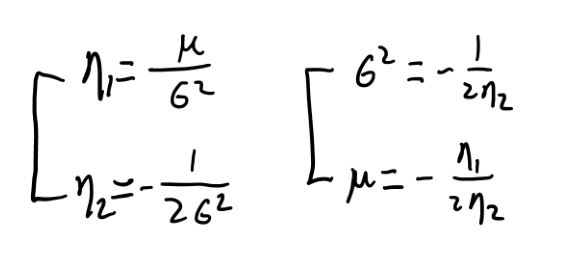

In [12]:
# 解
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.4解.png')
plt.axis('off')
ax.imshow(d)

## 2.4.1最大似然和充分统计量

现在来最大似然，首先标准形式是：
$$ p(x|\eta) = h(x)g(\eta)exp\{\eta^Tu(x)\} \tag{2.194} $$

我们对2.195两边取梯度，有
$$ g(\eta)\int h(x)exp\{\eta^Tu(x)\}dx = 1 \tag{2.195} $$

$$ \begin{eqnarray} &\nabla& g(\eta)\int h(x)exp\{\eta^Tu(x)\}dx \ &+& g(\eta)\int h(x)exp\{\eta^Tu(x)\}u(x)dx = 0 \tag{2.224} \end{eqnarray} $$

整理有

$$ -\frac{1}{g(\eta)}\nabla g(\eta) = g(\eta)\int h(x)exp\{\eta^Tu(x)\}u(x)dx = \mathbb{E}[u(x)] \tag{2.225} $$
其中使用了式（2.195）。于是得到：

$$ -\nabla\ln g(\eta) = \mathbb{E}[u(x)] \tag{2.226} $$





注意，$u(x) $的协方差可以由$ g(\eta) $的二阶导数来表达。对于高阶矩以此类推。**因此，如果一个来自指数族的分布可以被归一化(有$g(\eta)$)，那么就可以通过简单的微分来找到它的矩（一阶：期望，二阶：方差）。**

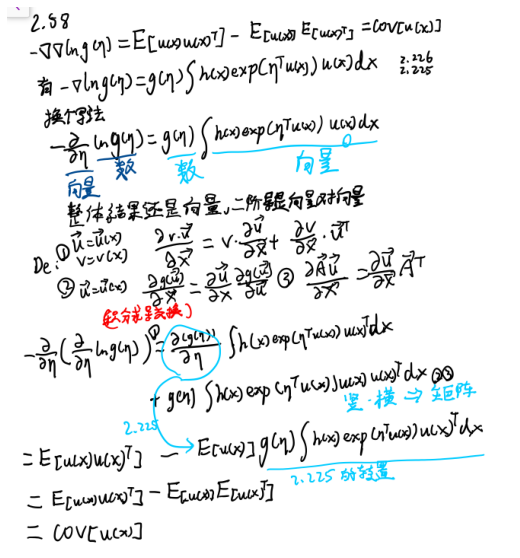

In [8]:
# 2.58（23那里有点跳跃）
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.4.1推导.png')
plt.axis('off')
ax.imshow(d)

现在考虑一组独立同分布的数据$ X={x_1,...,x_n} $，它的似然函数为：

$$
p(\boldsymbol{X} \mid \boldsymbol{\eta})=\left(\prod_{n=1}^{N} h\left(\boldsymbol{x}_{n}\right)\right) g(\boldsymbol{\eta})^{N} \exp \left\{\boldsymbol{\eta}^{T} \sum_{n=1}^{N} \boldsymbol{u}\left(\boldsymbol{x}_{n}\right)\right\}
\tag{2.227} $$

令$ \ln p(X|\eta) $关于$ \eta $的梯度为0，得到最大似然估计$ \mu_{ML} $满足（类比2.224可以计算）

$$ -\nabla \ln g(\eta_{ML}) = \frac{1}{N}\sum\limits_{n=1}^N u(x_n) \tag{2.228} $$

最大似然解仅仅关于$ \sum_n u(x_n) $相关，这就是充分统计量。我们不用存数据集而保存充分统计量就行。举个例子，对于伯努利分布，函数$ u(x) $就是$ x $，因此我们只需要存储数据点$ {x_n} $的和。而对于高斯分布$u(x) = (x, x^2)^T $，因此我们应该同时存储$ {x_n}, {x_n^2} $的和。

如果考虑极限$N \to \infty $，那么式（2.228）的右手边就变成$ \mathbb{E}[u(x)] $，并与式（2.226）比较得到在这个极限下$ \eta_{ML} $等于真实的$ \eta $的值。

实际上，这种充分性对于贝叶斯推断也成立（第八章）

## 2.4.2 共轭先验

我们已经在伯努利分布（共轭先验是beta分布）和高斯分布（均值的共轭先验是高斯，精度的共轭先验是Wishart分布 2.3.6gamma分布最后），碰到过几次共轭先验的概念。

通常来说，对于给定的分布$ p(x|\eta) $，可以找到与似然函数共轭的先验$p(\eta) $，因此，后验分布与先验有同样的函数形式。对于任意的式（2.194）的指数族成员，都有一个可以写成：

$$ p(\eta|\boldsymbol{X},v) = f(\boldsymbol{X},v)g(\eta)^vexp\{v\eta^T\boldsymbol{X}\} \tag{2.229} $$
其中$ f(\mathcal{x},v) $是标准化系数，且$ g(\eta) $和出现在式（2.194）中的是同一个函数。为了证明这实际是共轭的，让先验（2.229）乘以似然函数（2.227）来获取后验分布，忽略标准化系数，得到：
$$
p(\boldsymbol{\eta} \mid \boldsymbol{X}, \boldsymbol{\chi}, \nu) \propto g(\boldsymbol{\eta})^{\nu+N} \exp \left\{\boldsymbol{\eta}^{T}\left(\sum_{n=1}^{N} \boldsymbol{u}\left(\boldsymbol{x}_{n}\right)+\nu \boldsymbol{\chi}\right)\right\}
\tag{2.230} $$

这同样与先验（2.229）具有相同的函数形式，确认是共轭的。此外，参数$v $可以解释为先验分布中伪观测数量，给定$ \mathcal{x} $下每个伪观测都对充分统计量$ u(x) $有贡献。

## 2.4.3 无信息先验

在一些概率推断应用中，我们可能会有能用先验分布方便的表达出来的先验知识。例如，如果先验令变量的一些值的概率为0，那么不论后续观测到什么数据，后验分布都会令这些值的概率为0。但是，在许多情形下，我们几乎不知道分布应该具有的形式。这时，我们可能需找一种被称为无信息先验（noninformative prior）的先验分布。这种先验分布的目的是尽可能的后验分布产生小的影响，这有时也被称为“让数据自己说话”。

如果一个有参数$ \lambda $控制的分布$ p(x|\lambda) $。对于先验，最简单的提出$ p(\lambda) = const $是合适的先验。如果$ \lambda $是有$ K $个状态的离散变量，这相当于简单的设置每个状态的概率为$ 1 / K $。然而，在连续参数的情况下，这种方法有两个潜在的困难。
- 第一个是：如果$ \lambda $的定义域域是无界的，这时关于$ \lambda $的积分是发散的，所以先验分布不能被正确的标准化。

- 第二个困难来自于变量的非线性改变下的概率密度变换行为，由式（1.27）给出：这里:$x=g(y)$<p>
    $p_{y}(y)=p_{x}(x)\left|\frac{\mathrm{d} x}{\mathrm{d} y}\right|=p_{x}(g(y))\left|g^{\prime}(y)\right| \tag{1.27}$ <p>
    


如果函数$ h(\lambda) $是常数，且进行变量替换$ \lambda = \eta^2 $，那么$ \hat{h}(\eta) = h(\eta^2) $也会常数。但是，如果选择密度$ p_\lambda(\lambda) $等于常数，那么根据式（1.27），$ \eta $的概率密度为：

$$ p_\eta(\eta) = p_\lambda(\lambda)\Bigg\vert\frac{d\lambda}{d\eta}\Bigg\vert = p_\lambda(\eta^2)2\eta \propto \eta \tag{2.231} $$

这时$ \eta $的概率密度就不再是常数了（矛盾了）。由于似然函数$ p(x|\lambda) $是关于$ \lambda $的简单函数，所以这个问题不会出现在最大似然中，所以可以自由的使用任意方便的参数化方法。如果选择了常数作为先验分布，那么必须注意对参数要使用一个合适的表达法。

这里考虑两个无信息先验的简单例子（Berger, 1985）。首先，概率密度形式为：

$ p(x|\mu) = f(x-\mu) \tag{2.232} $

其中$ \mu $被称为位置参数（location parameter）。因为如果我们把$ x $平移一个常数，得到$ \hat{x} = x + c $，那么

$$ p(\hat{x}|\hat{\mu}) = f(\hat{x} - \hat{\mu}) \tag{2.233} $$

其中$ \hat{\mu} = \mu + c $，所以这类密度具有平移不变性。所以新变量的概率密度的形式与原变量相同，因此密度与原点的选择无关。我们想要选择一个反映这个平移不变性的先验分布，所以我们选择一个赋予区间$ A \leq \mu \leq B $与区间$ A - c \leq \mu \leq B - c $相同的概率质量的先验。这隐含：

$$ \int_A^Bp(\mu)d\mu = \int_{A-c}^{B-c}p(\mu)d\mu = \int_A^Bp(\mu-c)d\mu \tag{2.234} $$

而且这对于任意的$ A,B $选择都成立，所以得到：

$$ p(\mu - c) = p(\mu) \tag{2.235} $$

这隐含了$ p(\mu) $是一个常数。

位置参数的一个例子是高斯分布的均值$ \mu $。正如我们已经看到的，这种情况下的$ \mu $的共轭先验分布是一个高斯$ p(\mu|\mu_0,\sigma_0^2) = \mathcal{N}(\mu|\mu_0,\sigma_0^2) $，然后取极限$\sigma_0^2 \to \infty $得到一个无信息先验(高斯函数变平，像均匀函数)。事实上，从式（2.141）和（2.142）可以知道，在这种极限情况下，得到的$ \mu $的后验分布中，先验的贡献消失了。


$$ \begin{eqnarray} \mu_N &=& \frac{\sigma^2}{N\sigma_0^2+\sigma^2}\mu_0 + \frac{N\sigma_0^2}{N\sigma_0^2+\sigma^2}\mu_{ML} \tag{2.141} \\ \frac{1}{\sigma_N^2} &=& \frac{1}{\sigma_0^2} + \frac{N}{\sigma^2} \tag{2.142} \end{eqnarray} $$

第二个例子，考虑密度形式：

$$ p(x|\sigma) = \frac{1}{\sigma}f\left(\frac{x}{\sigma}\right) \tag{2.236} $$

其中$ \sigma > 0 $。注意，如果$ f(x) $被正确的标准化，那么这是一个标准化的密度。参数$ \sigma $是伸缩参数（scale parameter）。如果我们把$ x $缩放一个常数即$ \hat{x} = cx $，有

$$ p(\hat{x}|\hat{\sigma}) = \frac{1}{\hat{\sigma}}f\left(\frac{\hat{x}}{\hat{\sigma}}\right) \tag{2.237} $$

其中$ \hat{\sigma} = c\sigma $，这就是概率密度的伸缩不变性（scale invariance）。这个变换对应单位的变化，例如，长度$x $的单位从米变成了千米，我们想要选择一个反映这个伸缩不变性的先验分布。如果我们考虑区间$ A \leq \sigma \leq B $和伸缩伸缩区间$ A/c \leq \sigma \leq B/c $，对两个区间赋予相同的概率质量。得到：

$$ \int_A^Bp(\sigma)d\sigma = \int_{A/c}^{B/c}p(\sigma)d\sigma = \int_A^Bp\left(\frac{1}{c}\sigma\right)\frac{1}{c}d\sigma \tag{2.238} $$

因为这对于任意的$ A,B $选择都成立，所以得到：

$$ p(\sigma) = p\left(\frac{1}{c}\sigma\right)\frac{1}{c} \tag{2.239} $$

得到$ p(\sigma) \propto 1/\sigma $。由于分布在$ 0 \leq \sigma \leq \infty $的积分是发散的，所以这是一个非正常先验。有时把缩放参数的先验分布用参数的对数的概率密度表达更方便。使用公式（1.27）的概率密度变换规则，我们看到$ p(\ln\sigma) = const $。因此，对于这个先验分布，在区间$ 1 \leq \sigma \leq 10 $和区$ 10 \leq \sigma \leq 100 $和以及区$ 100 \leq \sigma \leq 1000 $和上具有相同的概率质量。

缩放参数的一个例子是高斯分布的标准差$ \sigma $，在我们确定了位置参数$ \mu $之后。由于

$$ \mathcal{N}(x|\mu,\sigma^2) \propto \sigma^{-1} exp\{-(\tilde{x}/\sigma)^2\} \tag{2.240} $$

其中$ \tilde{x} = x - \mu $。就如之前讨论的，使用精度$ \lambda = 1/\sigma^2 $会比$\sigma $方便的多。使用密度的变换规则，得到分布$ p(\sigma) \propto 1/\sigma $对应$ \lambda $上的分布形式$ p(\lambda) \propto 1/\lambda $。我们已经知道$ \lambda $的共轭先验是式（2.146）给出的gamma分布$ Gam(\lambda|a_0,b_0) $。无信息先验在$ a_0 = b_0 = 0 $的特殊情况下得到。同样的，如果检查式（2.150）和式（2.151）给出的$ \lambda $的后验分布的结果，得到对于$ a_0 = b_0 = 0 $，后验分布只与数据相关，而与先验分布无关。

$ Gam(\lambda|a,b) = \frac{1}{\Gamma(a)}b^a\lambda^{a-1}exp(-b\lambda) \tag{2.146} $

$$ \begin{eqnarray} a_N &=& a_0 + \frac{N}{2} \tag{2.150} \\ b_N &=& b_0 + \frac{1}{2}\sum\limits_{n=1}^N(x_n - \mu)^2 = b_0 + \frac{N}{2}\sigma_{ML}^2 \tag{2.151} \end{eqnarray} $$

参考文献：http://prml.yutorihiro.com/chapter-2/2-58/

## 2.5 非参数估计
一般的参数化的模型有个局限性：对于生成数据来说，可能选了一个很差的模型去拟合。比方说一个多峰数据的生成过程就很难被单峰的高斯模型来捕捉到。所以看看简单频度学家的非参数估计。

之前我们也有用过：图1.11说明边缘分布和条件分布

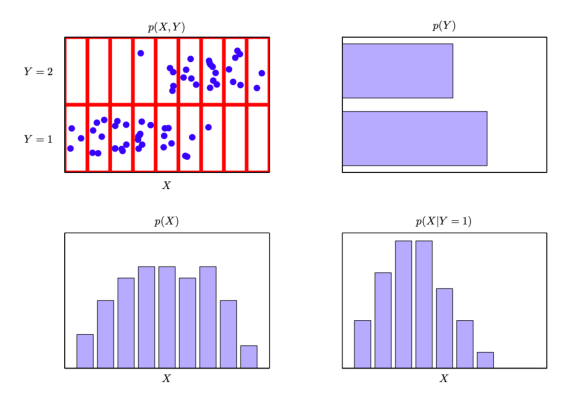

In [18]:
# 图1.11
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/图1.11.png')
plt.axis('off')
ax.imshow(d)

图2.6 中心极限定理。均值随数据量增加的变化。

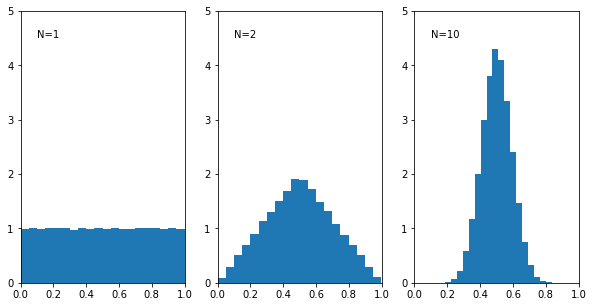

In [22]:
# 均匀分布
uniform = Uniform(low=0, high=1)
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.xlim(0, 1)
plt.ylim(0, 5)
plt.annotate("N=1", (0.1, 4.5))
plt.hist(uniform.draw(100000), bins=20, density=True)

plt.subplot(1, 3, 2)
plt.xlim(0, 1)
plt.ylim(0, 5)
plt.annotate("N=2", (0.1, 4.5))
plt.hist(0.5 * (uniform.draw(100000) + uniform.draw(100000)), bins=20, density=True)

plt.subplot(1, 3, 3)
plt.xlim(0, 1)
plt.ylim(0, 5)
sample = 0
for _ in range(10):
    sample = sample + uniform.draw(100000)
plt.annotate("N=10", (0.1, 4.5))
plt.hist(sample * 0.1, bins=20, density=True)

plt.show()

一元连续变量$x $下的直方图密度估计。标准的直方图简单地把$ x $划分成宽度为$ \Delta_i $的不同箱子，然后对落在第$ i $个箱子中的$x $的观测数量$ n_i $进行计数。为了把这种计数转换成标准化的概率密度，简单地把观测数量除以观测的总数$ N $，再除以箱子的宽度$ \Delta_i $，得到每个箱子的概率的值（直方图中）：

$$ p_i = \frac{n_i}{N\Delta_i} \tag{2.241} $$

从中显然可得$ \int p(x)dx = 1 $。这就给出了一个对于每个箱子的密度$ p(x) $是常数的模型，通常会选择相同宽度的箱子，即$ \Delta_i = \Delta $。



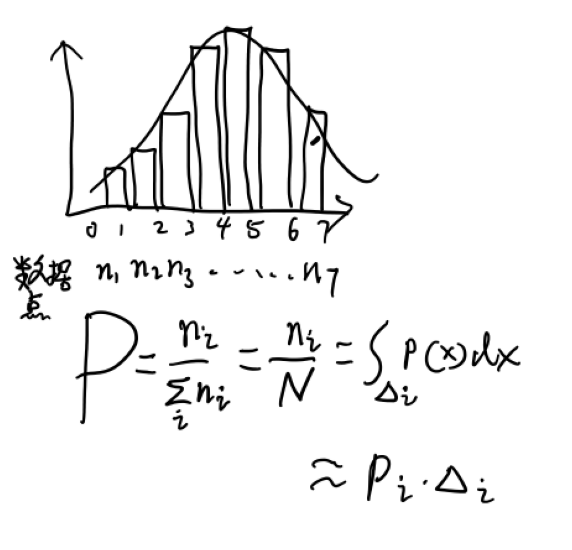

In [9]:
# 换种讲法
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.5换种说法.png')
plt.axis('off')
ax.imshow(d)

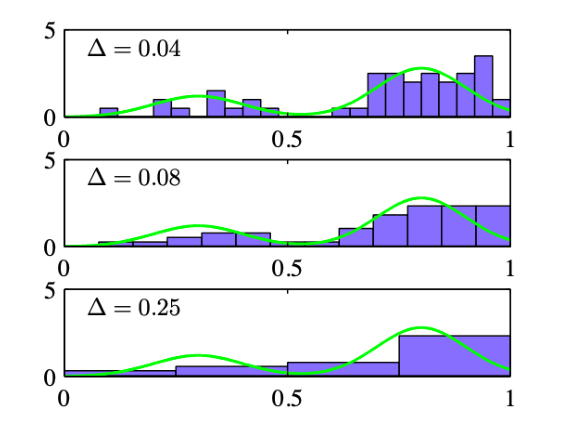

In [10]:
# 2.24
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.52.24.png')
plt.axis('off')
ax.imshow(d)

这展示了三种不同的箱子宽度$ \Delta $的选择的情况。
- 当$ \Delta $非常小的时候（最上面的图）得到的密度模型是非常尖的，有很多结构没有出现在生成数据的概率分布中。
- 当$ \Delta $过大（最下面的图），那么最终的概率模型会过于平滑，结果无法扑捉绿色曲线的双峰性质。
- 当$ \Delta $取一个 中等大小的值时（中间的图），可以得到最好的结果。

优势：
- 直方图画出，数据就可以丢弃了。（大量数据情况有利）
- 直观显示一维和二维数据。

缺点：
- 箱子边缘造成概率密度不连续性； 
- 维数灾难。如果我们把$D $维空间的每一维的变量都划分到$M $个箱子中，那么箱子的总数为$ M^D $。这种对于$ D $的指数放大是维度灾难的一个例子。在高维空间中，想对于局部概率密度进行有意义的估计，需要的数据量是不可接受的。

重要点：
- 为了估计在某个特定位置的概率密度，需要考虑位于那个点的**某个邻域内的数据点**。注意，局部性的概念要求我们假设某种形式的距离度量，这里我们假设的是欧几里得距离。对于直方图，这种邻域的性质由箱子定义，且有一个自然的“平滑”参数描述局部区域的空间扩展，即这里的箱子宽度。
- 为了获得好的结果，**平滑参数的值既不能太大也不能太小**。这让我们回忆起了第1章讨论过的多项式曲线拟合问题中对于模型复杂度的选择。那里是多项式的阶数$ M $或者正则化参数$ \alpha $，被优化成了某些中等大小的值，既不太大也不太小。

有了这些认识，让我们讨论密度估计的两个广泛使用的非参数化方法：核估计以及近邻估计。与简单的直方图方法相比，这两种方法能更好的处理维度放大的情况。

参考资料： https://www.youtube.com/watch?v=EGWP8-bHvEk

## 2.5.1 核密度估计


假设观测是D维空间未知概率分布p(x),希望估计。看包含x的小区域R，概率密度是：

$$ P = \int_Rp(x)dx \tag{2.242} $$
假设收集了R内部的K个数据点，服从二项分布：x落在区域R中被观测到，数量为K个的概率。

$$ Bin(K|N,P) = \frac{N!}{K!(N-K)!}P^K(1-P)^{N-K} \tag{2.243} $$

使用2.11，2.12(在给定数据集规模N的条件下，x=1的观测出现数量m的概率分布的期望和方差)

$$
\mathbb{E}[m] \equiv \sum_{m=0}^{N} m \operatorname{Bin}(m \mid N, \mu)=N \mu \tag{2.11}
$$

$$
\mathbb{E}[m] \equiv \sum_{m=0}^{N} (m-E[m])^2 \operatorname{Bin}(m \mid N, \mu)=N \mu(1-\mu) \tag{2.12}
$$

得到落在区域内部的数据点的平均比例（mean fraction）为$ \mathbb{E}[K/N] = P $，同时引用式（2.12）得到这个均值的方差为$ var[K/N] = P(1-P)/N $。

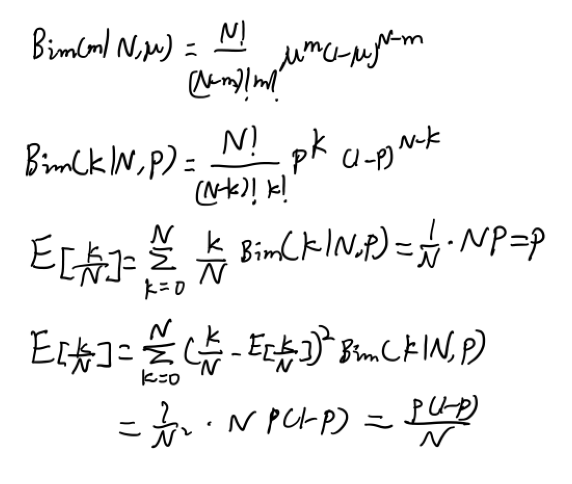

In [11]:
# 小推导
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.5.1小推导.png')
plt.axis('off')
ax.imshow(d)

对于大的$ N $值，这个分布将会在均值附近产生尖峰(方差变小)，且

$$ K \simeq NP \tag{2.244} $$

但是，如果同时假定区域R足够小，使得在这个区域内的概率密度p(x)大致为常数，那么就有

$$ P \simeq p(x)V \tag{2.245} $$

其中$V $是$ R $的体积。结合式（2.244）和（2.245）得到密度估计的形式：

$$ p(x) = \frac{K}{NV} \tag{2.246} $$
注意，式（2.246）的成立依赖于两个相互矛盾的假设，即区域$ R $要足够小，使得这个区域内的概率密度近似为常数，但是也要足够大（关于密度的值），使得落在这个区域内的数据点的数量$ K $足够让二项分布达到尖峰。(太少就没点在区域里)



因为p(x)概率函数和N是数据点。我们有两种思路：
- 固定K，通过数据确定V，就是k邻近算法。
- 固定V，通过数据确定K的值，就是核方法。

可以证明在极限$ N \to \infty $下，V随N的增加而收缩，K随N的增加而增大。最终两种方法得到的概率密度都会收敛于真实的概率密度。(Duda and Hart, 1973)。


首先是核方法，我们把区域$ R $取成以想确定概率密度的点$ x $为中心的小超立方体。为了统计落在这个区域内的数据点的数量$ K $，定义函数

$$
k(\boldsymbol{u})=\left\{\begin{array}{ll}
1, & \left|u_{i}\right| \leq \frac{1}{2}, \quad i=1, \ldots, D \\
0, & \text { 其他情况 }
\end{array}\right.
\tag{2.247} $$

这表示一个以原点为中心的单位立方体。函数k(u)就是核函数的一个例子。从式（2.247），如果数据点$ x_n $位于以$ x $为中心的边长为$ h $的立方体中，那么量$ k((x-x_n)/h) $等于1，否则它的值为0。位于这个立方体内的数据点的总数为：

$$ K = \sum\limits_{n=1}^Nk\left(\frac{x-x_n}{h}\right) \tag{2.248} $$


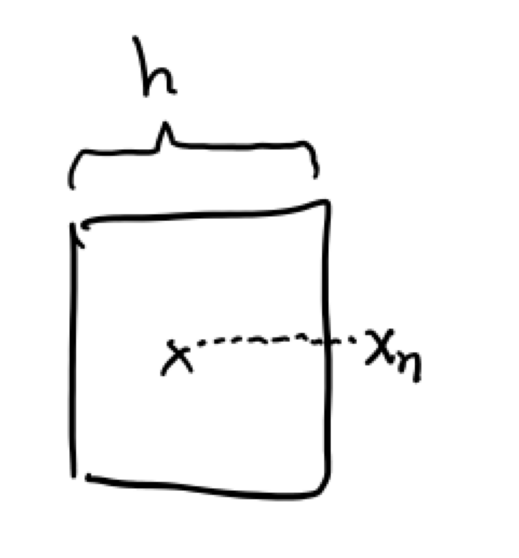

In [12]:
#示意图
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.5.1示意图.png')
plt.axis('off')
ax.imshow(d)

把这个表达式代入式（2.246），可以得到点$ x $处的概率密度估计

$$ p(x) = \frac{1}{N}\sum\limits_{n=1}^N\frac{1}{h^D}k\left(\frac{x-x_n}{h}\right) \tag{2.249} $$

使用函数$ k(u) $的对称性（两点距离计算），可以重新解读这个等式为以$ N $个数据点$ x_n $为中心的$ N $个立方体的和，而不是解读为以$ x$为中心的一个立方体。

但问题跟直方图一样，非连续性。（不是1就是0）.这个是由密度估计中立方体的边界带来的。如果我们选择一个平滑的核函数，那么就可以得到一个更加光滑的模型。一个常用的选择是高斯核函数，它给出

$$
p(\boldsymbol{x})=\frac{1}{N} \sum_{n=1}^{N} \frac{1}{\left(2 \pi h^{2}\right)^{\frac{D}{2}}} \exp \left\{-\frac{\left\|\boldsymbol{x}-\boldsymbol{x}_{n}\right\|^{2}}{2 h^{2}}\right\}
\tag{2.250} $$

其中$h$表示高斯分布的标准差。这个密度模型是通过使每个数据点服从高斯，然后把它们的贡献加起来得到的，之后除以$ N $，使得概率密度被正确的标准化。图2.25中展示了把模型（2.250）应用于之前用来说明直方图方法的数据集上的图像。

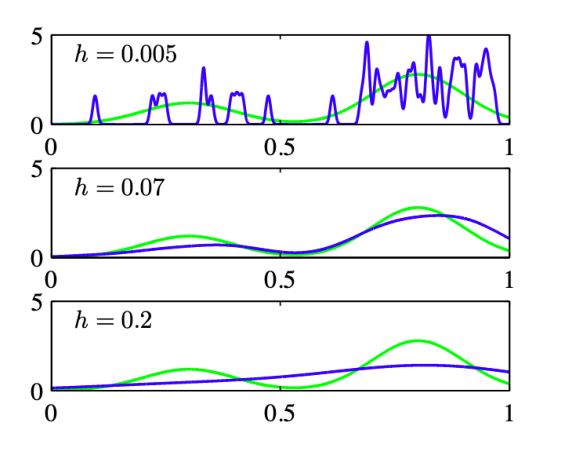

In [13]:
# 2.25
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.5.12.25.png')
plt.axis('off')
ax.imshow(d)

看到，和我们期望的一样，参数$ h $担当平滑参数的角色，且需要在，小的$ h $会造成模型对噪声过于敏感,而大的$ h $会造成过度平滑间做一个权衡。同样的，对$ h $的优化是一个模型复杂度的问题，类似于直方图密度估计中对于箱子宽度的选择，也类似于曲线拟合问题中的多项式阶数。

其实可以选择任何2.249的核函数，只要满足条件：

$$ \begin{eqnarray} k(u) &\geq& 0, \tag{2.251} \\ \int k(u)du &=& 1 \tag{2.252} \end{eqnarray} $$

这确保了最终求得的概率分布在处处都是非负的，且积分等于1。式（2.249）给出的这类密度模型被称为核密度估计，或Parzen估计。它的一个很大的优点是：因为“训练”阶段只需要存储训练集即可，所以它不需要进行“训练”阶段的计算（只需要写个方程）。然而，这也是一个巨大的缺点，因为密度估计的计算代价随着数据集的规模线性增长（每个点都参与了计算）。

## 2.5.2 邻近方法
密度估计的核方法的一个问题是控制核宽度的参数$ h $对于所有核都是固定的。在高数据密度区域，大的$ h $值可能会导致过于平滑，且破坏了本应从数据中提取出的结构。但是，减小$ h $的值可能导致数据空间中低密度区域估计的噪声（本来是连续的，采集不到点）。所以$ h $的最优选择依赖于数据空间中的位置。这个问题可以由密度估计的近邻算法来解决。

因此，回到局部密度估计的一般结果（2.246），与之前固定$ V $然后从数据中确定$ K $的值不同，我们考虑固定$ K $的值然后使用数据来确定合适的$ V $值。为了达到这个目的，考虑一个以点$x $为中心的小球体，我们希望估计密度$ p(x) $，且允许球体的半径可以自由增加，直到它精确地包含$ K $个数据点。概率密度$p(x) $的估计就由式（2.246）给出，其中$ V $等于得到的球体的体积。这就是K近邻算法。图2.26展示了与图2.24、2.25相同的数据集下不同的K的选择。

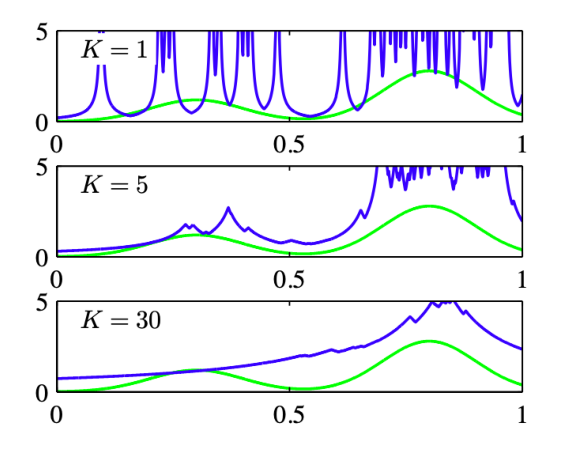

In [14]:
# 2.26
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.5.22.26.png')
plt.axis('off')
ax.imshow(d)

我们看到现在$ K $的值控制了光滑的程度，且与之前一样，$ K $的最优选择既不能太大也不能太小。注意，由于对所有空间的积分是发散的，所以K近邻算法产生的模型不是真正的密度模型。(图中，特别高的值)

最后，将k近邻估计推广到分类问题。为此，对每个独立的类别应用K近邻估计，然后使用贝叶斯定理。
假设有类别$ C_k $的数据点$ N_k $个，总共$N $个点的数据集，即$ \sum_kN_k = N $。如果想确定新数据点$ x $的分类，那么我们画一个以$ x $为中心的，正好包含$ K $个不论属于哪个类别的数据点的球体。这样，式（2.246）为每个类别提供了密度估计：

$$ p(x|C_k) = \frac{K_k}{N_kV} \tag{2.253} $$

同样的，无条件概率密度为

$$ p(x) = \frac{K}{NV} \tag{2.254} $$

其中类别的先验是由

$$ p(C_k) = \frac{N_k}{N} \tag{2.255} $$

给出。现在使用贝叶斯定理将式（2.253）、（2.254）和（2.255）结合起来，得到类别的后验概率：

$$ p(C_k|x) = \frac{p(x|C_k)p(C_k)}{p(x)} = \frac{K_k}{K} \tag{2.256} $$

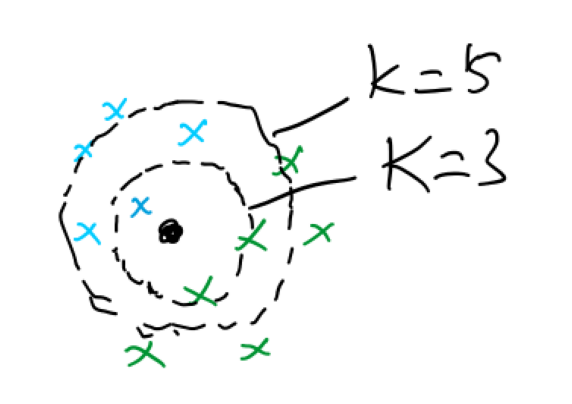

In [15]:
# k圈
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.5.2k圈.png')
plt.axis('off')
ax.imshow(d)

如果希望误分类的概率最小，那么可以把测试点$x $分配给有着最大后验概率的类别，对应着最大的$ K_k / K $。含义就是为了给新的数据点分类，我们从训练数据中选择$ K $个最近的数据点，然后把新的数据点分配为这个集合中数量最多的点的类别。

特例$ K = 1 $，因为简单地把测试点分类为训练数据集里距离最近的数据点的类别，所以被称为最近邻规则(nearest-neighbour rule)，。图2.27展示了这些概念。

In [ ]:
# 2.27
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.5.22.27.png')
plt.axis('off')
ax.imshow(d)

In [ ]:
# 2.28
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.5.22.28.png')
plt.axis('off')
ax.imshow(d)

在图2.28中，展示了第一章中介绍的石油流数据集在不同的$ K $值下的$K $近邻算法的结果。如我们期望的那样,K控制着光滑度，即小的$K $值会使得每个类别有许多小区域，而大的$ K $值会产生数量较少面积较大的区域。

最近邻(K = 1)分类器的一个有趣的性质是在极限$ N \to \infty $的情况下，它的错误率不会超过最优分类器（即真实概率分布的分类器）可以达到的最小错误率的二倍（Cover and Hart, 1967）。（也不错，等于真实）

正如到目前为止讨论的那样，K近邻方法和核密度估计方法都需要存储整个训练数据，这导致计算大数据集会非常昂贵。通过一种基于树的探索结果，可以一次额外的计算来，不遍历整个数据集高效地找到（近似）近邻。尽管这样，这些非参数化方法然有很大的局限性。

另一方面，我们已经看到，简单的参数化模型非常受限，只能表示某一种形式的概率分布。因此我们需要寻找一种非常灵活概率密度模型，且它的复杂度可以被控制为与训练数据的规模无关。在后续章节中将会看到如何找到这种概率密度模型。

参考文献：
- https://www.bilibili.com/video/BV1HE411N7p6?from=search&seid=15578013898088571208
- https://www.youtube.com/watch?v=EGWP8-bHvEk